In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt, ticker as mticker

In [2]:
# Define your data for EF at 1%
dekois_sf_data_ef1 = pd.read_csv('./DEKOIS_RESULTS/results_dockm8_EF_1%.csv')
dekois_sf_data_ef1['Average'] = dekois_sf_data_ef1.iloc[:, 4:].mean(axis=1)
dekois_sf_data_ef1.sort_values('Average', ascending=False)
dekois_top_1_percent = dekois_sf_data_ef1.nlargest(int(len(dekois_sf_data_ef1) * 0.01), 'Average')
dekois_top_01_percent = dekois_sf_data_ef1.nlargest(int(len(dekois_sf_data_ef1) * 0.001), 'Average')
dekois_top_001_percent = dekois_sf_data_ef1.nlargest(int(len(dekois_sf_data_ef1) * 0.0001), 'Average')


In [7]:
# Count occurrences in 'consensus' for both subsets
dekois_consensus_counts_1 = dekois_top_1_percent['consensus'].value_counts(dropna=False).fillna(0)
dekois_consensus_counts_01 = dekois_top_01_percent['consensus'].value_counts(dropna=False).fillna(0)
dekois_consensus_counts_001 = dekois_top_001_percent['consensus'].value_counts(dropna=False).fillna(0)

# Convert counts to DataFrame for plotting
dekois_consensus_df_1 = dekois_consensus_counts_1.reset_index()
dekois_consensus_df_1.columns = ['Consensus', 'Count']
dekois_consensus_df_01 = dekois_consensus_counts_01.reset_index()
dekois_consensus_df_01.columns = ['Consensus', 'Count']
dekois_consensus_df_001 = dekois_consensus_counts_001.reset_index()
dekois_consensus_df_001.columns = ['Consensus', 'Count']

# Combine for comparison in one plot
dekois_consensus_df_1['Percentile'] = 'Top 1%'
dekois_consensus_df_01['Percentile'] = 'Top 0.1%'
dekois_consensus_df_001['Percentile'] = 'Top 0.01%'
combined_dekois_consensus_df = pd.concat([dekois_consensus_df_001, dekois_consensus_df_01, dekois_consensus_df_1])
combined_dekois_consensus_df = combined_dekois_consensus_df.reset_index(drop=True)
display(combined_dekois_consensus_df)


Consensus  Count Percentile
0   Zscore_best     59  Top 0.01%
1      ECR_best      3  Top 0.01%
2   Zscore_best    554   Top 0.1%
3      ECR_best     61   Top 0.1%
4       ECR_avg      3   Top 0.1%
5    Zscore_avg      2   Top 0.1%
6      RbV_best      1   Top 0.1%
7   Zscore_best   5022     Top 1%
8      ECR_best    747     Top 1%
9    Zscore_avg    251     Top 1%
10      ECR_avg     93     Top 1%
11     RbV_best     55     Top 1%
12     RbR_best     35     Top 1%
13      RbV_avg     12     Top 1%
14          NaN      1     Top 1%

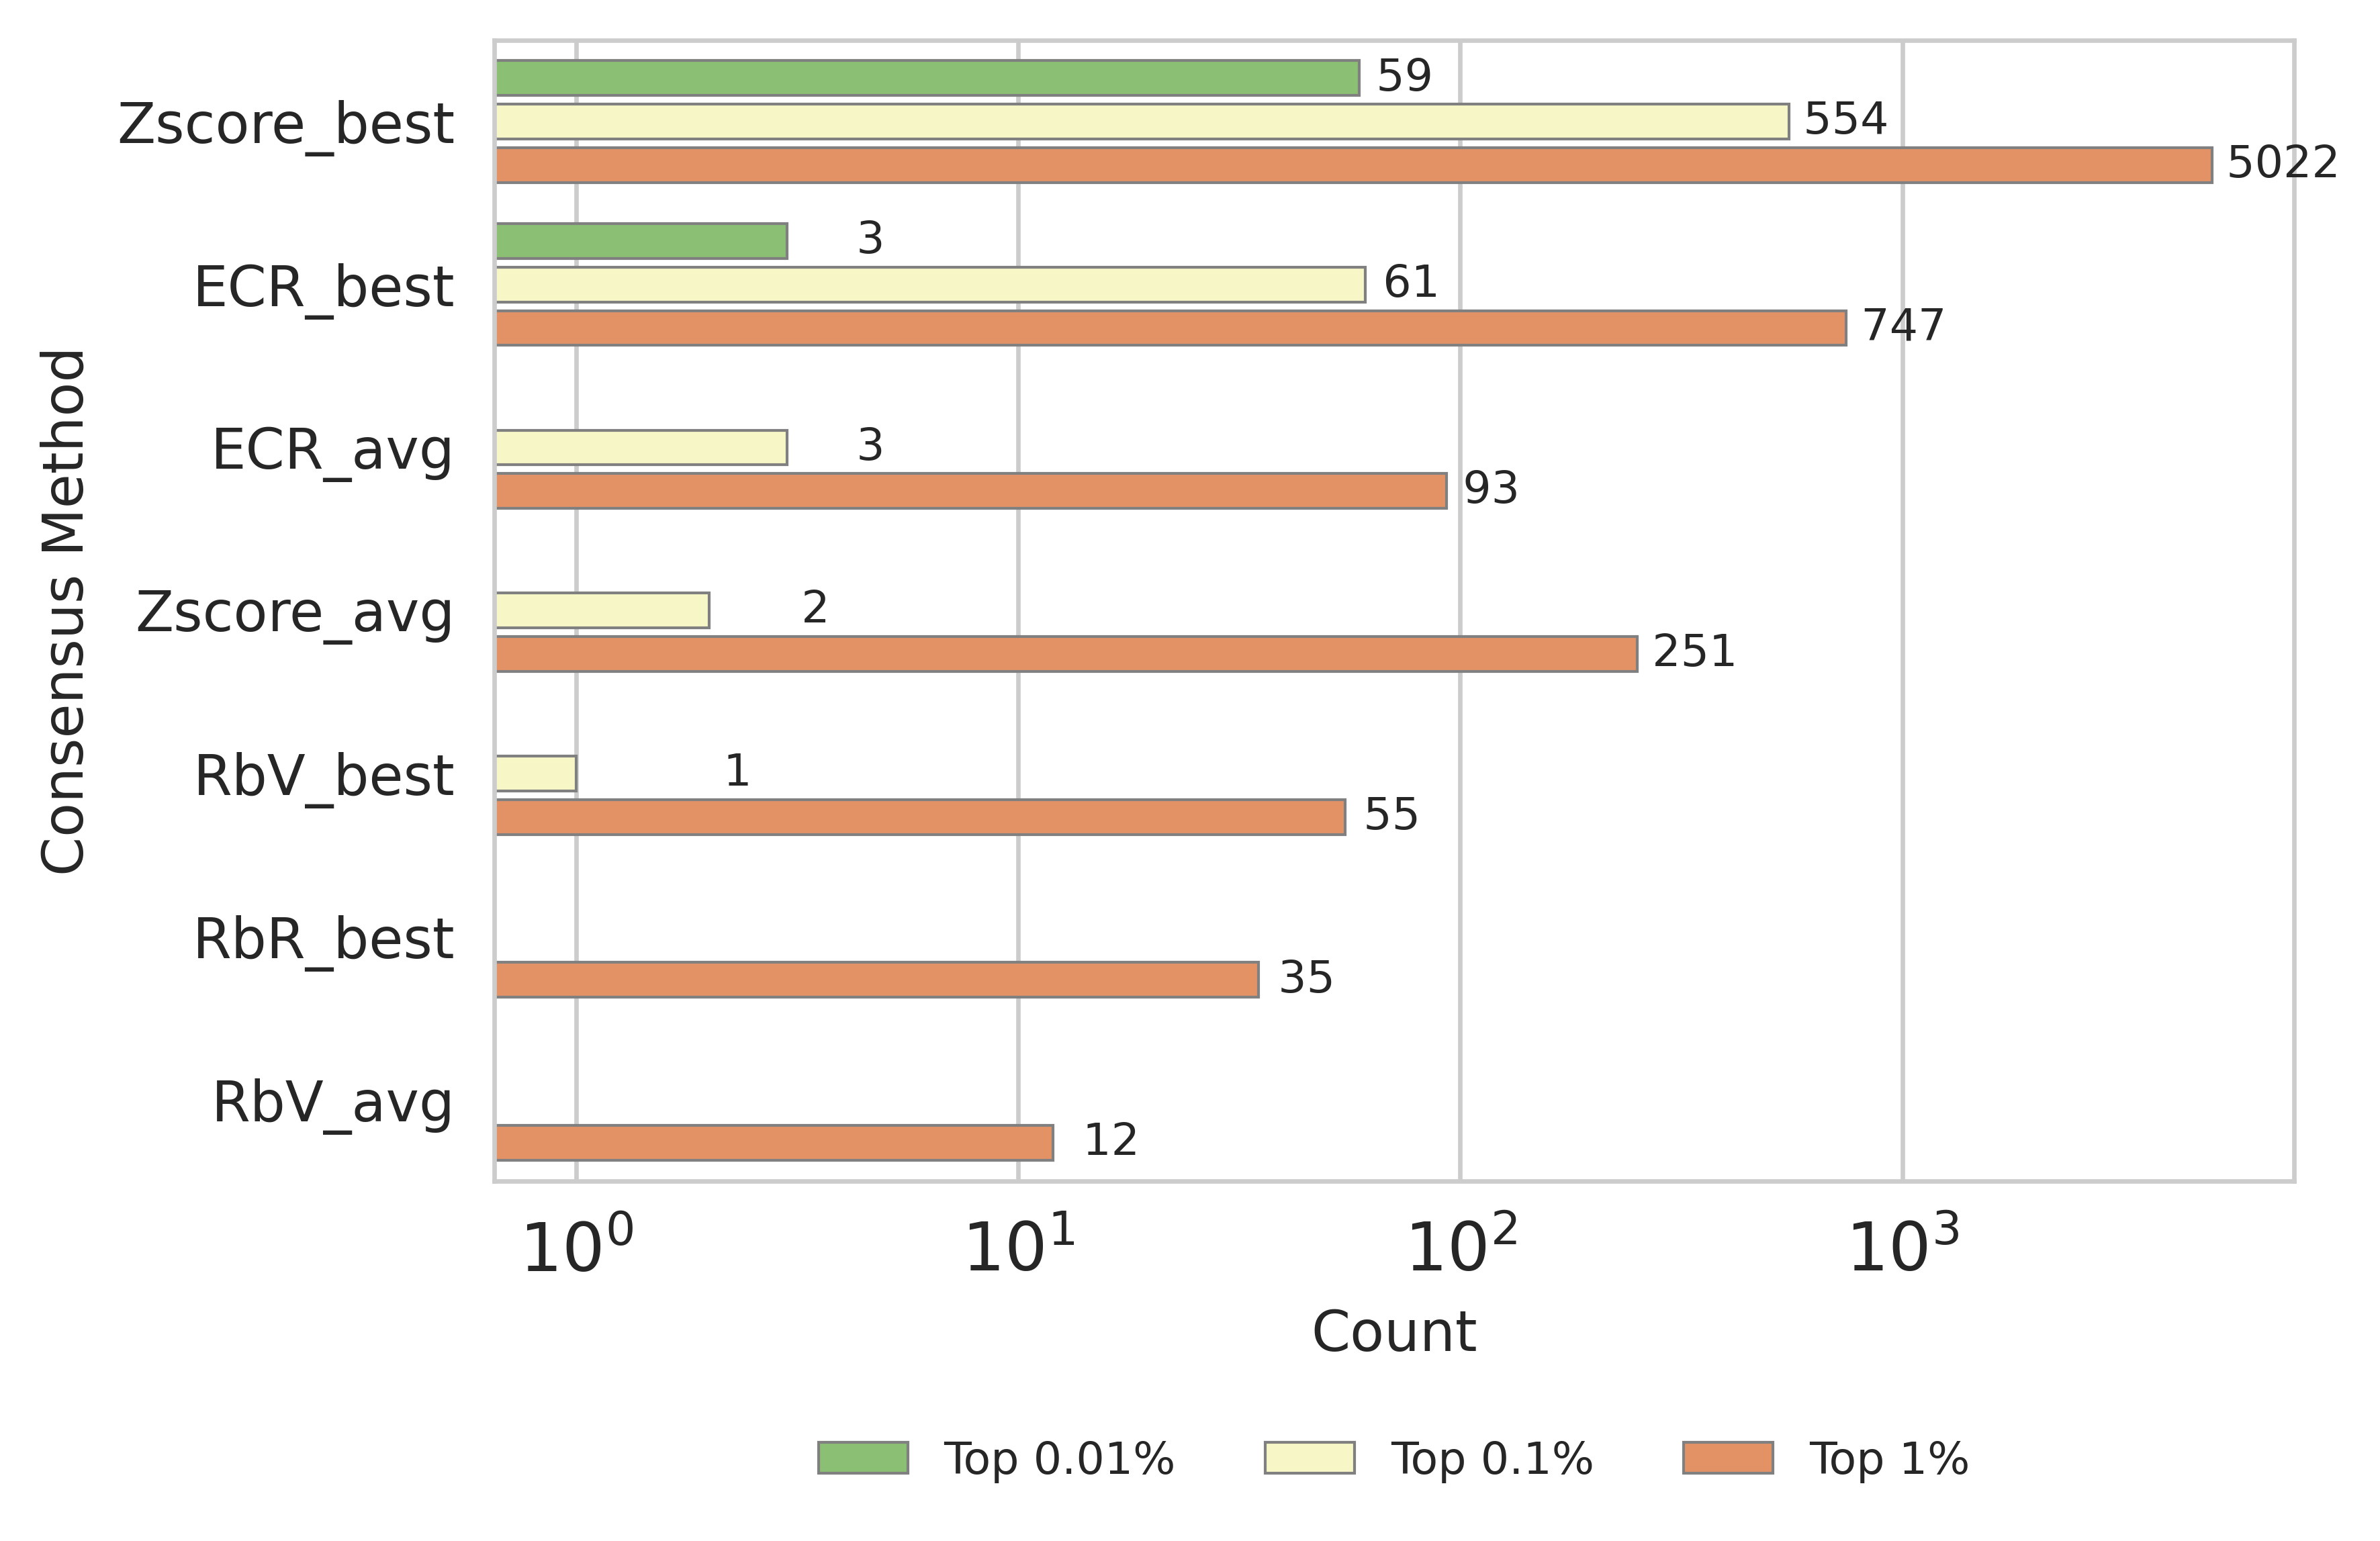

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4), dpi=600)

# Plotting the count data
ax = sns.barplot(x='Count', 
                 y='Consensus', 
                 hue='Percentile', 
                 data=combined_dekois_consensus_df, 
                 palette="RdYlGn_r",  # Reverse the palette
                 width=0.8,
                 gap=0.2,
                 edgecolor='grey',
                 linewidth=0.5)
plt.xscale('log')

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel('Count')
plt.ylabel('Consensus Method')
plt.xticks(fontsize=12)
plt.legend(loc='lower center',
           fontsize=8,
           frameon=False,
           ncol=4, 
           bbox_to_anchor=(0.5, -0.3))
plt.tight_layout()

# Save and show the plot
plt.savefig("./DEKOIS_consensus_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()


In [10]:
# Count occurrences in 'consensus' for both subsets
dekois_clustering_counts_1 = dekois_top_1_percent['clustering'].value_counts(dropna=False).fillna(0)
dekois_clustering_counts_01 = dekois_top_01_percent['clustering'].value_counts(dropna=False).fillna(0)
dekois_clustering_counts_001 = dekois_top_001_percent['clustering'].value_counts(dropna=False).fillna(0)

# Convert counts to DataFrame for plotting
dekois_clustering_df_1 = dekois_clustering_counts_1.reset_index()
dekois_clustering_df_1.columns = ['Clustering', 'Count']
dekois_clustering_df_01 = dekois_clustering_counts_01.reset_index()
dekois_clustering_df_01.columns = ['Clustering', 'Count']
dekois_clustering_df_001 = dekois_clustering_counts_001.reset_index()
dekois_clustering_df_001.columns = ['Clustering', 'Count']

# Combine for comparison in one plot
dekois_clustering_df_1['Percentile'] = 'Top 1%'
dekois_clustering_df_01['Percentile'] = 'Top 0.1%'
dekois_clustering_df_001['Percentile'] = 'Top 0.01%'
combined_dekois_clustering_df = pd.concat([dekois_clustering_df_001, dekois_clustering_df_01, dekois_clustering_df_1])
combined_dekois_clustering_df = combined_dekois_clustering_df.reset_index(drop=True)

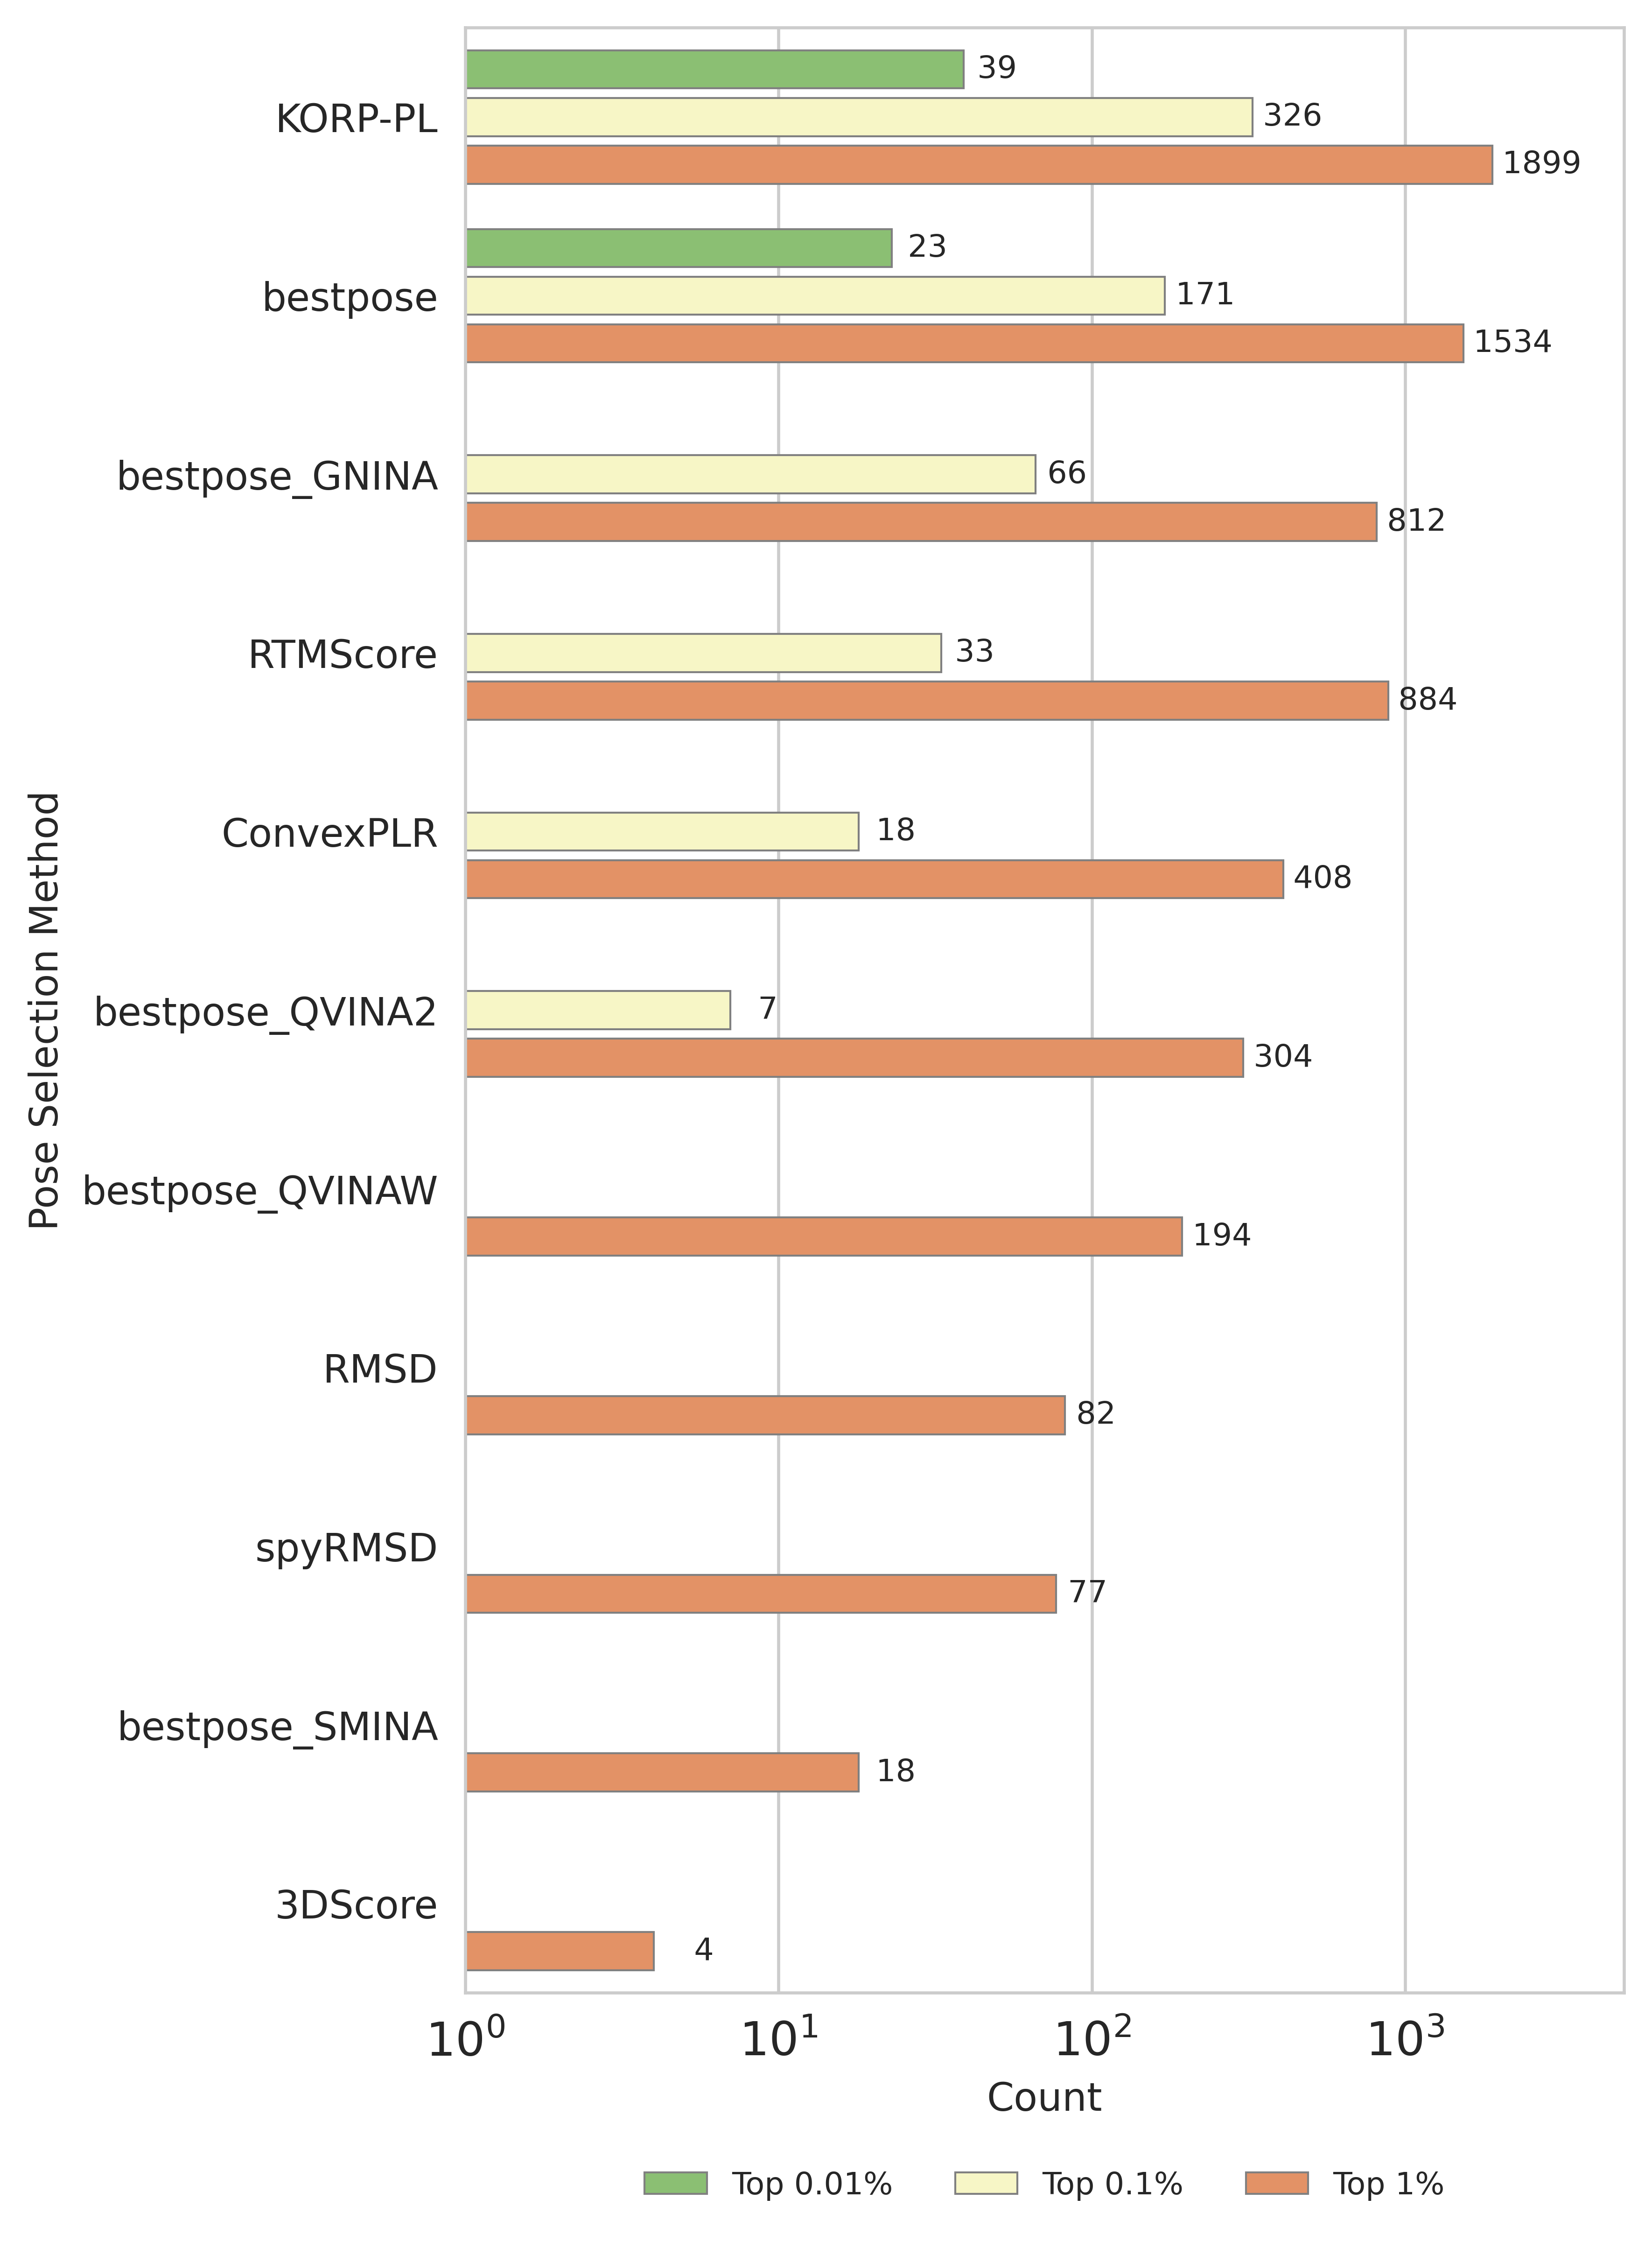

In [12]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)

# Plotting the count data
ax = sns.barplot(x='Count', 
                 y='Clustering', 
                 hue='Percentile', 
                 data=combined_dekois_clustering_df, 
                 palette="RdYlGn_r", 
                 width=0.8,
                 gap=0.2,
                 edgecolor='grey',
                 linewidth=0.5)
plt.xscale('log')

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel('Count')
plt.ylabel('Pose Selection Method')
plt.xticks(fontsize=12)
plt.xlim(1, 5000)
plt.legend(loc='lower center',
           fontsize=8,
           frameon=False,
           ncol=4, 
           bbox_to_anchor=(0.5, -0.12))
plt.tight_layout()

# Save and show the plot
plt.savefig("./DEKOIS_clustering_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()


In [13]:
# Function to split the 'scoring' column and count occurrences
def count_scoring_functions(df):
    scoring_functions = df['scoring'].str.split('_', expand=True).stack()
    return scoring_functions.value_counts(dropna=False).fillna(0)

dekois_scoring_counts_1 = count_scoring_functions(dekois_top_1_percent)
dekois_scoring_counts_01 = count_scoring_functions(dekois_top_01_percent)
dekois_scoring_counts_001 = count_scoring_functions(dekois_top_001_percent)

# Convert counts to DataFrame for plotting
dekois_scoring_df_1 = dekois_scoring_counts_1.reset_index()
dekois_scoring_df_1.columns = ['Scoring Function', 'Count']
dekois_scoring_df_01 = dekois_scoring_counts_01.reset_index()
dekois_scoring_df_01.columns = ['Scoring Function', 'Count']
dekois_scoring_df_001 = dekois_scoring_counts_001.reset_index()
dekois_scoring_df_001.columns = ['Scoring Function', 'Count']

# Combine for comparison in one plot
dekois_scoring_df_1['Percentile'] = 'Top 1%'
dekois_scoring_df_01['Percentile'] = 'Top 0.1%'
dekois_scoring_df_001['Percentile'] = 'Top 0.01%'
combined_dekois_scoring_df = pd.concat([dekois_scoring_df_001, dekois_scoring_df_01, dekois_scoring_df_1]).reset_index(drop=True)

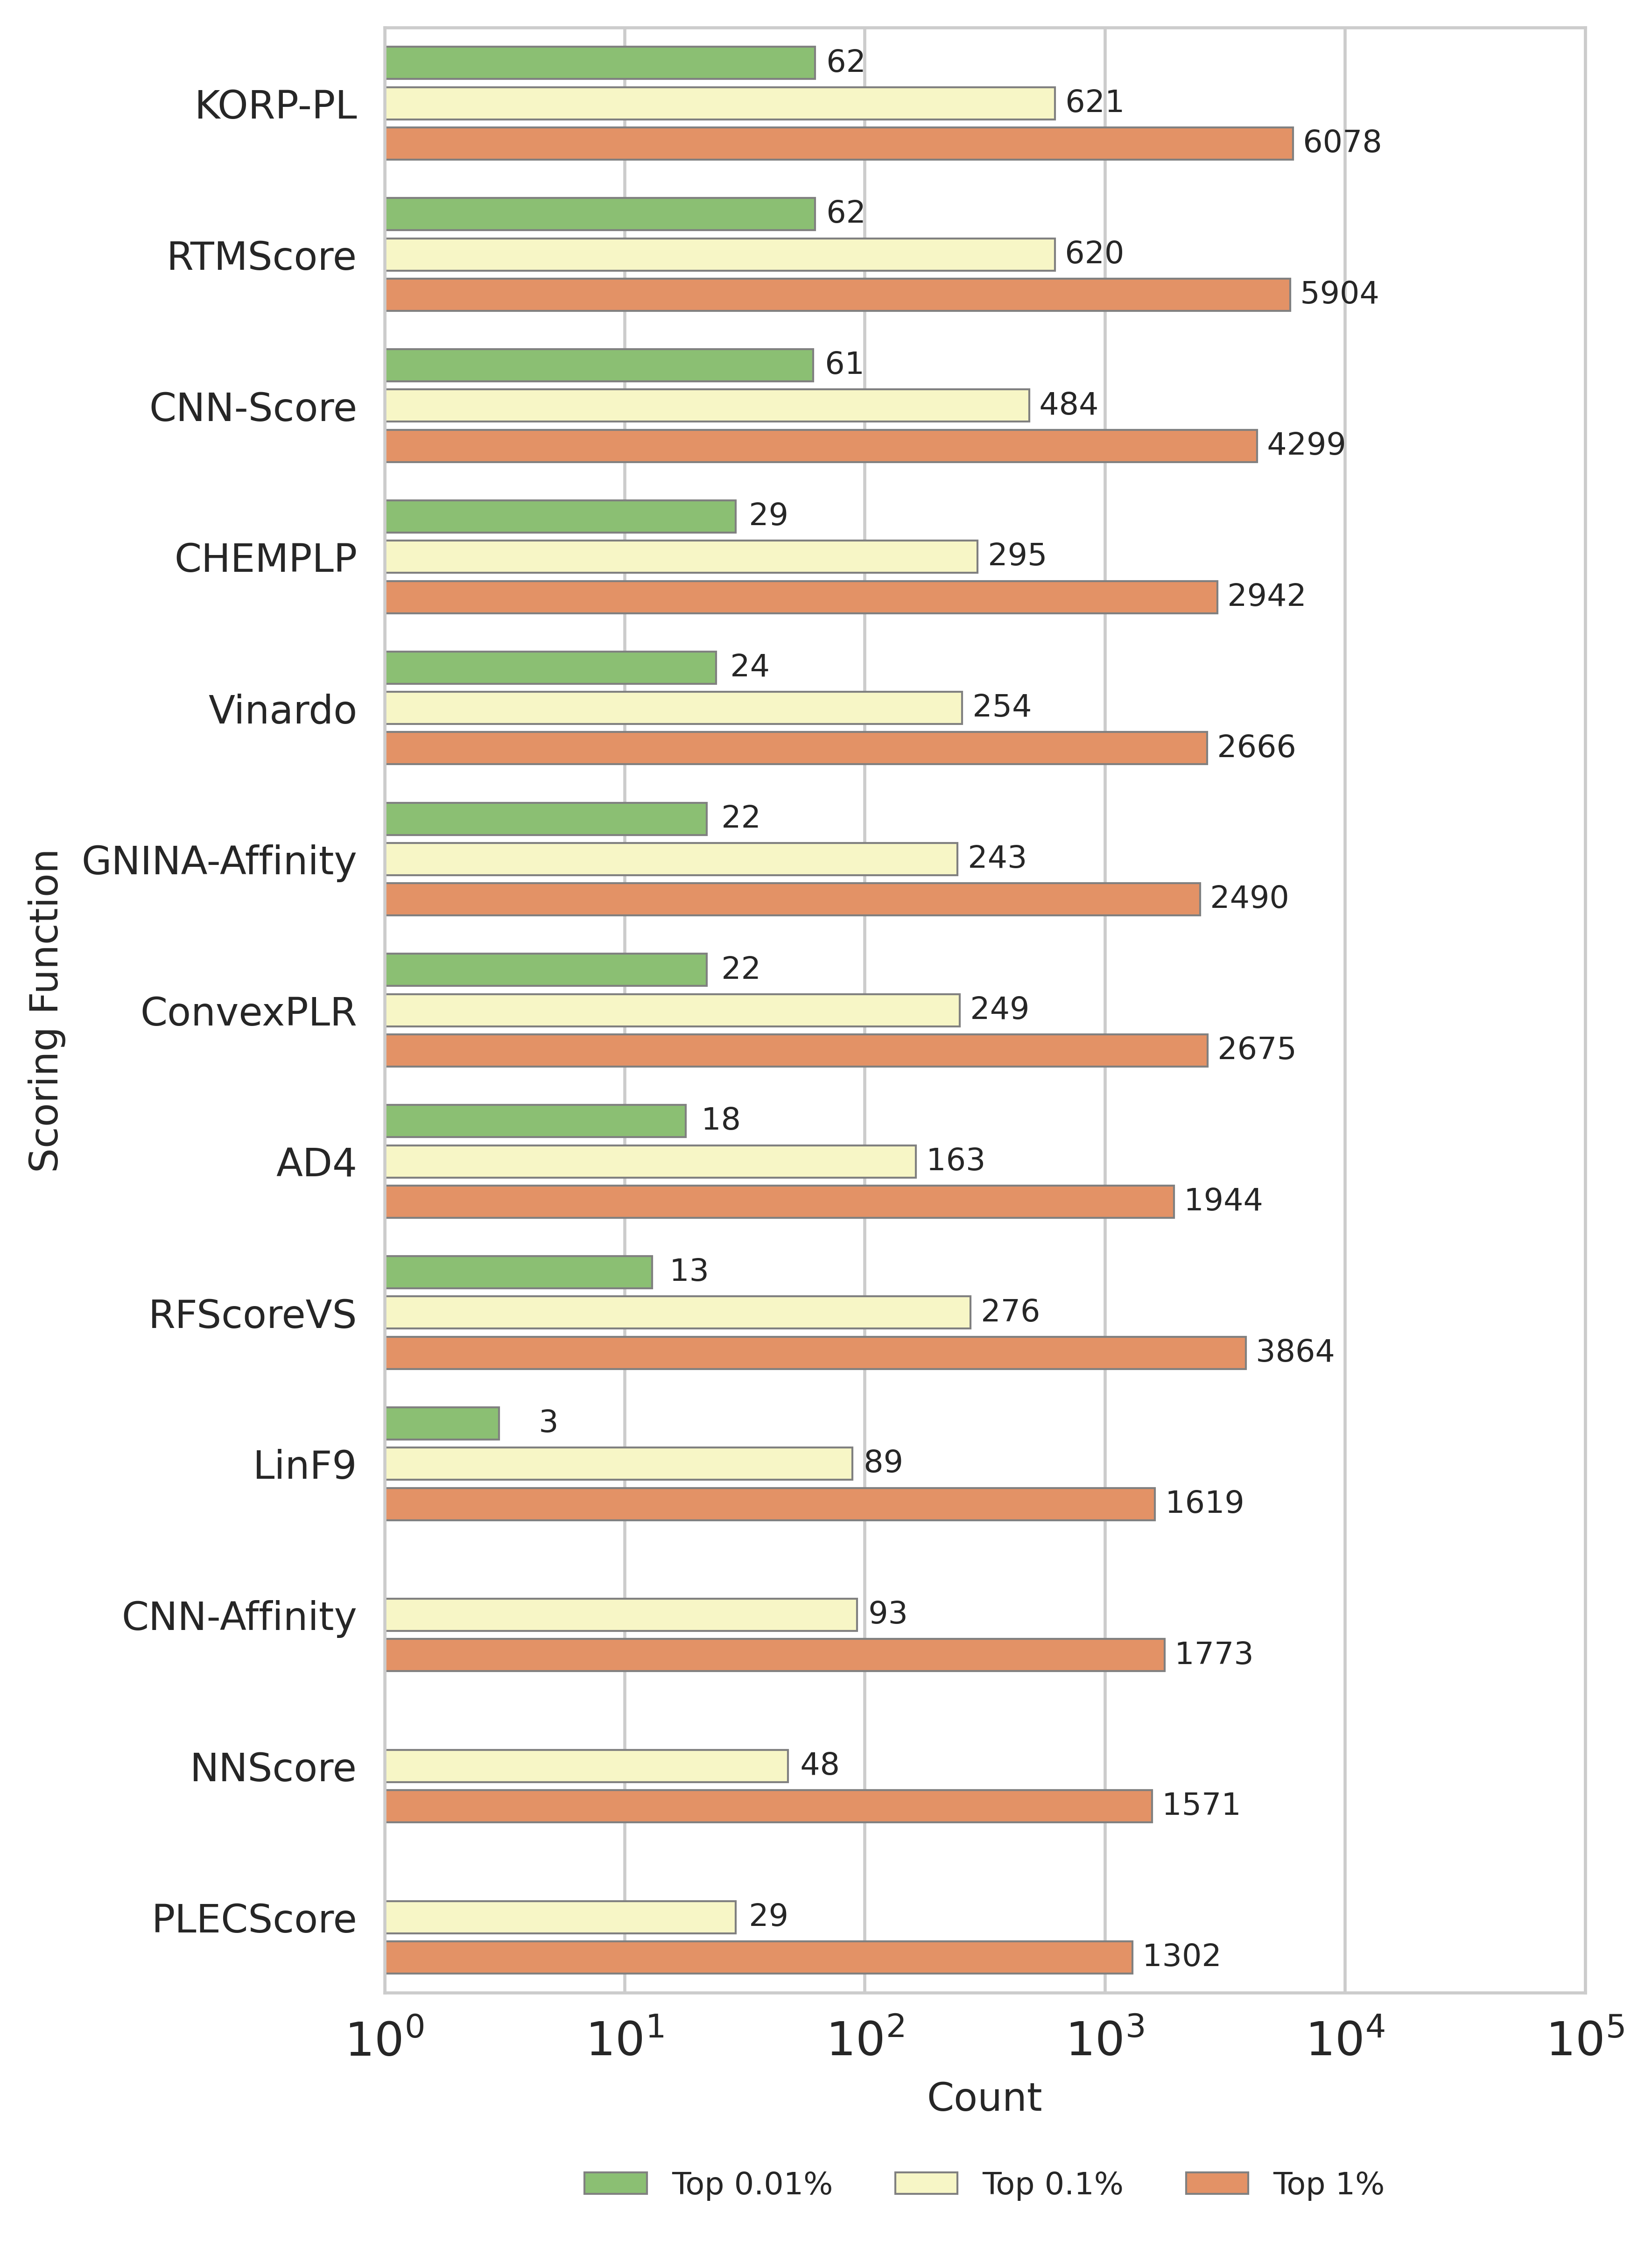

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)

# Plotting the count data
ax = sns.barplot(x='Count', 
                 y='Scoring Function', 
                 hue='Percentile', 
                 data=combined_dekois_scoring_df, 
                 palette="RdYlGn_r", 
                 width=0.8,
                 gap=0.2,
                 edgecolor='grey',
                 linewidth=0.5)
plt.xscale('log')

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel('Count')
plt.ylabel('Scoring Function')
plt.xticks(fontsize=12)
plt.legend(loc='lower center',
           fontsize=8,
           frameon=False,
           ncol=4, 
           bbox_to_anchor=(0.5, -0.12))
plt.xlim(1, 100000)
plt.tight_layout()

# Save and show the plot
plt.savefig("./DEKOIS_SF_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()


In [16]:
def get_number_of_scoring_functions(df):
    numbers = df['scoring'].apply(lambda x: str(x.count('_')+1) if '_' in x else str(1))
    return numbers.value_counts(dropna=False).fillna(0)

# Count occurrences in both subsets
dekois_scoringnumber_counts_1 = get_number_of_scoring_functions(dekois_top_1_percent)
dekois_scoringnumber_counts_01 = get_number_of_scoring_functions(dekois_top_01_percent)
dekois_scoringnumber_counts_001 = get_number_of_scoring_functions(dekois_top_001_percent)

# Convert counts to DataFrame for plotting
dekois_scoringnumber_df_1 = dekois_scoringnumber_counts_1.reset_index()
dekois_scoringnumber_df_1.columns = ['Amount of Scoring Functions', 'Count']
dekois_scoringnumber_df_01 = dekois_scoringnumber_counts_01.reset_index()
dekois_scoringnumber_df_01.columns = ['Amount of Scoring Functions', 'Count']
dekois_scoringnumber_df_001 = dekois_scoringnumber_counts_001.reset_index()
dekois_scoringnumber_df_001.columns = ['Amount of Scoring Functions', 'Count']

# Combine for comparison in one plot
dekois_scoringnumber_df_1['Percentile'] = 'Top 1%'
dekois_scoringnumber_df_01['Percentile'] = 'Top 0.1%'
dekois_scoringnumber_df_001['Percentile'] = 'Top 0.01%'
combined_dekois_scoringnumber_df = pd.concat([dekois_scoringnumber_df_001, dekois_scoringnumber_df_01, dekois_scoringnumber_df_1]).reset_index(drop=True)

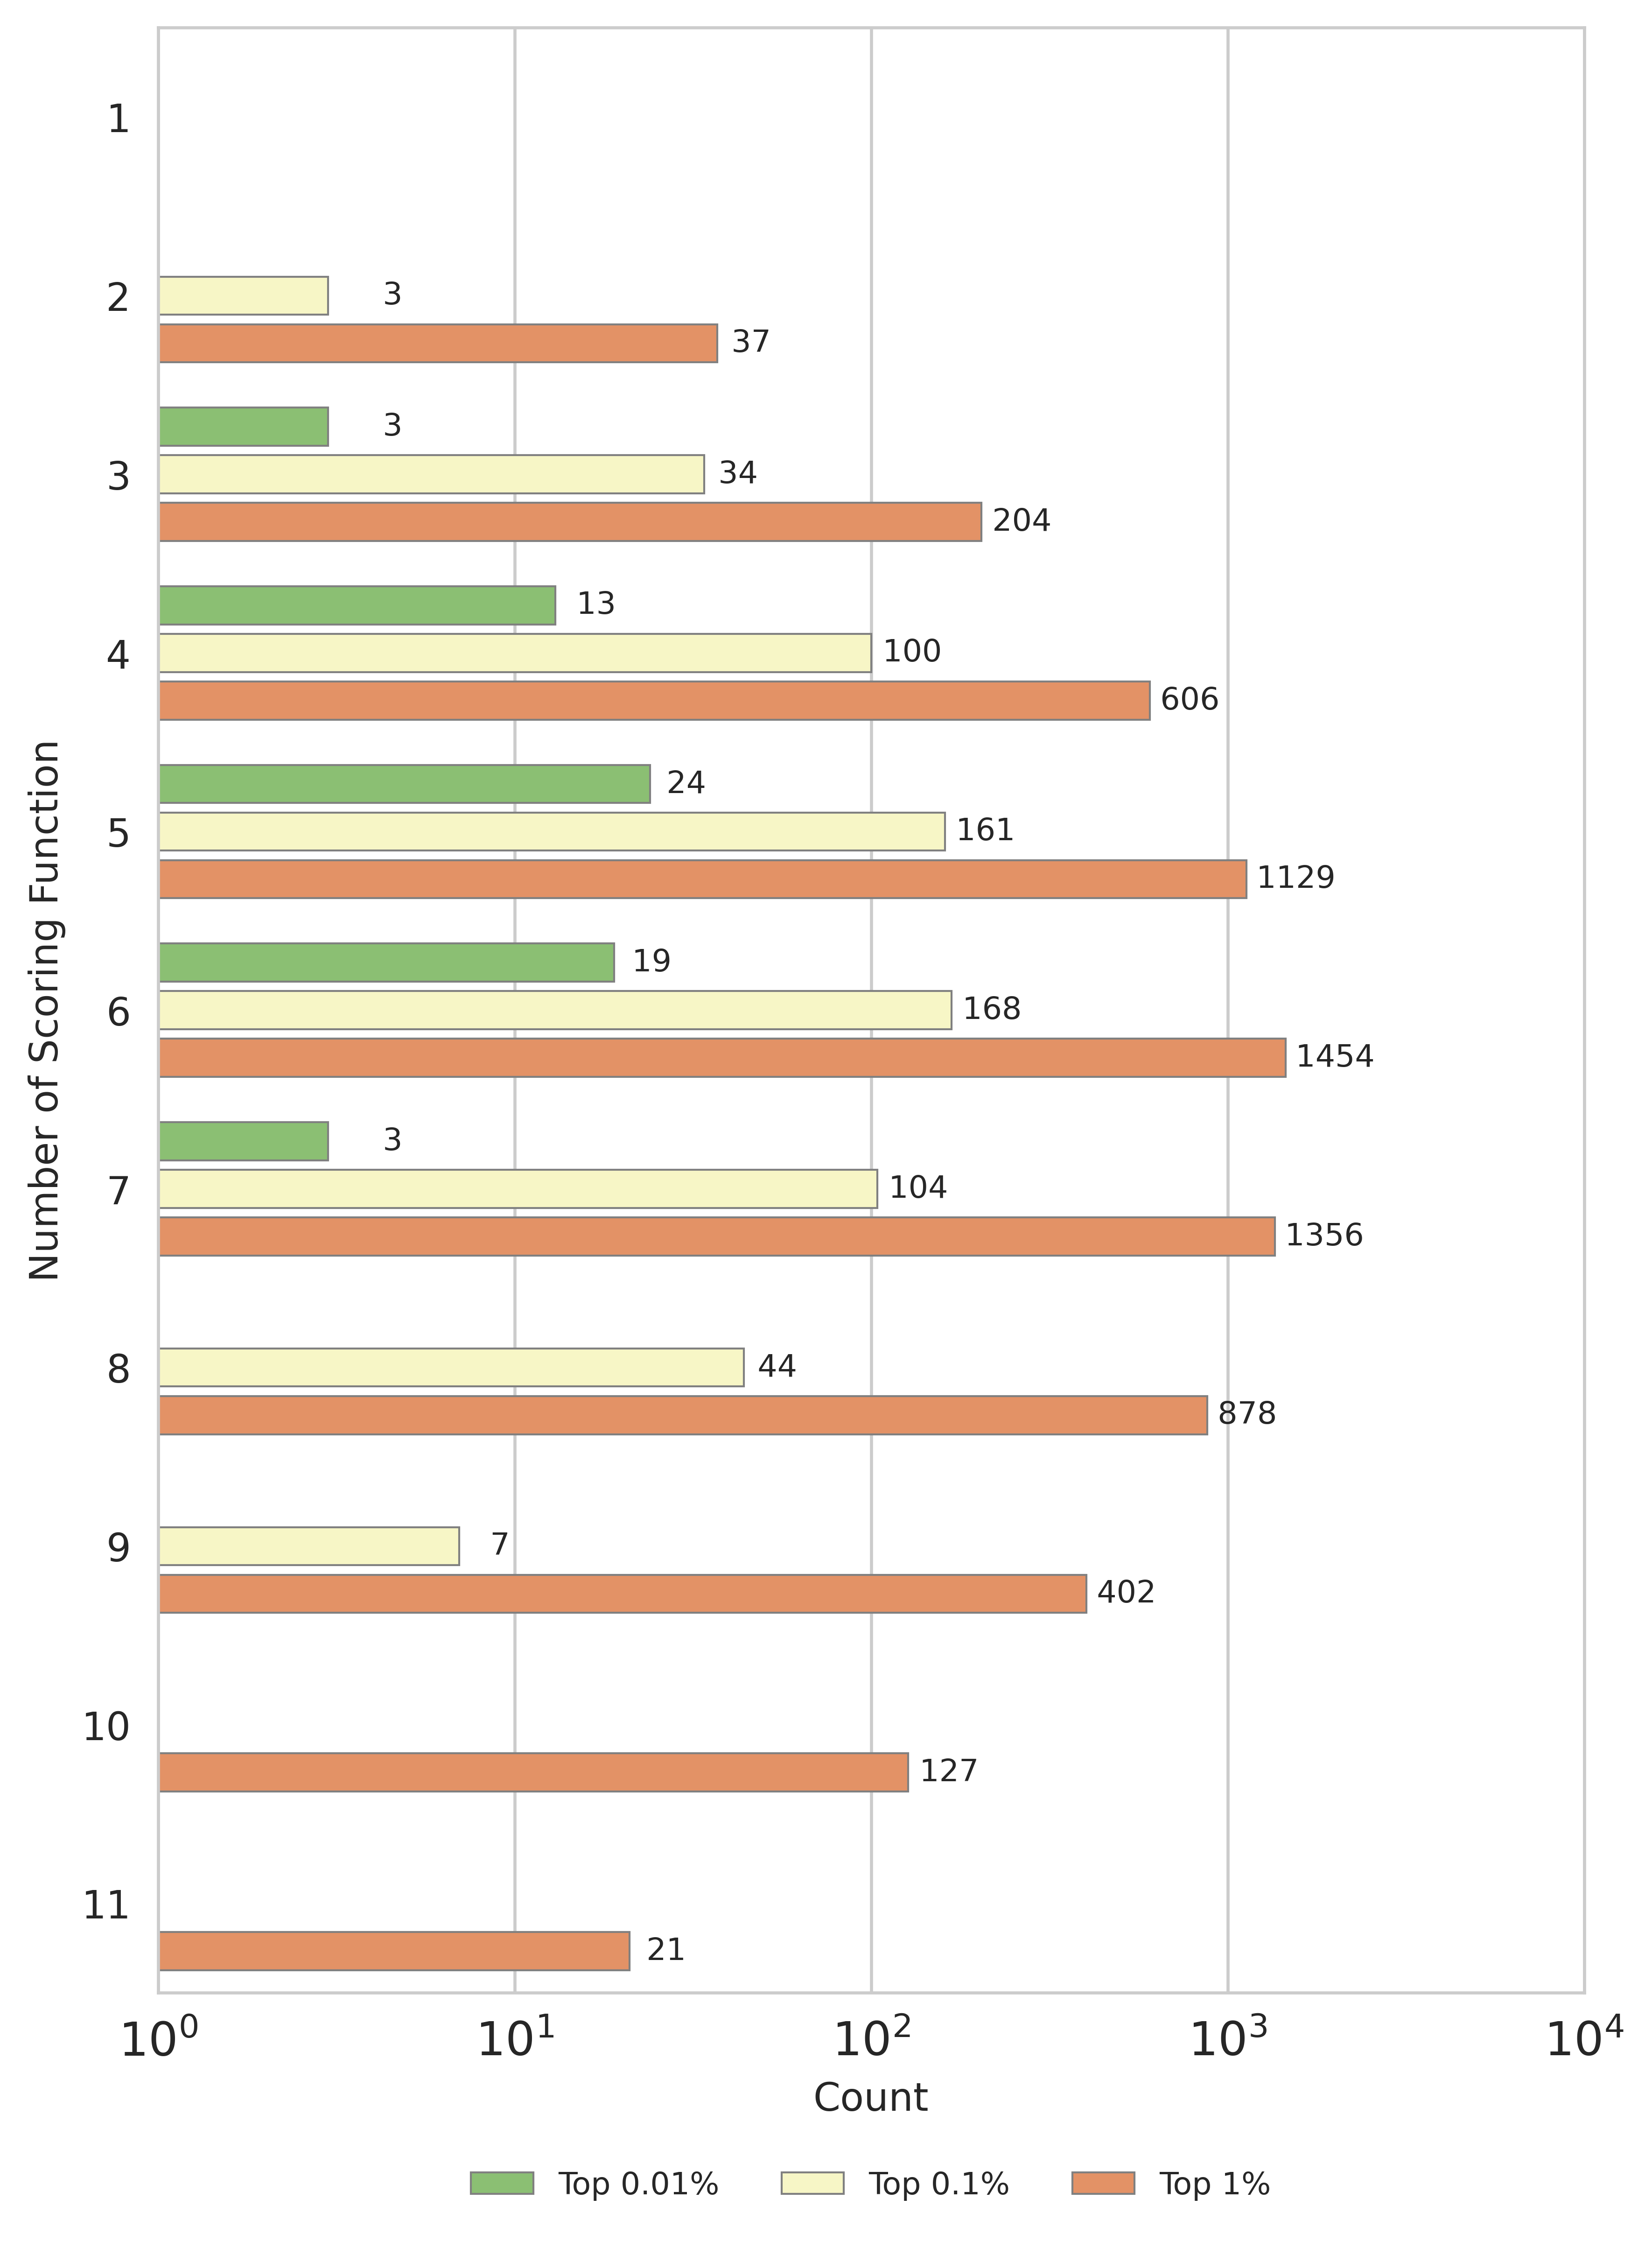

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)

# Plotting the count data
ax = sns.barplot(x='Count', 
                 y='Amount of Scoring Functions', 
                 hue='Percentile', 
                 data=combined_dekois_scoringnumber_df, 
                 order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],
                 palette="RdYlGn_r", 
                 width=0.8,
                 gap=0.2,
                 edgecolor='grey',
                 linewidth=0.5)
plt.xscale('log')

for p in ax.patches:
    width = p.get_width()
    if width > 1:
        ax.text(width + 1,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel('Count')
plt.ylabel('Number of Scoring Function')
plt.xticks(fontsize=12)
plt.legend(loc='lower center',
           fontsize=8,
           frameon=False,
           ncol=4, 
           bbox_to_anchor=(0.5, -0.12))
plt.xlim(1, 10000)
plt.tight_layout()

# Save and show the plot
plt.savefig("./DEKOIS_SF_number_counts.png", transparent=False, bbox_inches="tight")
plt.show()


In [19]:
# Define your data for EF at 1%
dude_sf_data_ef1 = pd.read_csv('./DUD-E_RESULTS/results_dockm8_EF_1%.csv')
dude_sf_data_ef1['Average'] = dude_sf_data_ef1.iloc[:, 4:].mean(axis=1)
dude_sf_data_ef1.sort_values('Average', ascending=False)
dude_top_1_percent = dude_sf_data_ef1.nlargest(int(len(dude_sf_data_ef1) * 0.01), 'Average')
dude_top_01_percent = dude_sf_data_ef1.nlargest(int(len(dude_sf_data_ef1) * 0.001), 'Average')
dude_top_001_percent = dude_sf_data_ef1.nlargest(int(len(dude_sf_data_ef1) * 0.0001), 'Average')


In [20]:
# Count occurrences in 'consensus' for both subsets
dude_consensus_counts_1 = dude_top_1_percent['consensus'].value_counts(dropna=False).fillna(0)
dude_consensus_counts_01 = dude_top_01_percent['consensus'].value_counts(dropna=False).fillna(0)
dude_consensus_counts_001 = dude_top_001_percent['consensus'].value_counts(dropna=False).fillna(0)

# Convert counts to DataFrame for plotting
dude_consensus_df_1 = dude_consensus_counts_1.reset_index()
dude_consensus_df_1.columns = ['Consensus', 'Count']
dude_consensus_df_01 = dude_consensus_counts_01.reset_index()
dude_consensus_df_01.columns = ['Consensus', 'Count']
dude_consensus_df_001 = dude_consensus_counts_001.reset_index()
dude_consensus_df_001.columns = ['Consensus', 'Count']

# Combine for comparison in one plot
dude_consensus_df_1['Percentile'] = 'Top 1%'
dude_consensus_df_01['Percentile'] = 'Top 0.1%'
dude_consensus_df_001['Percentile'] = 'Top 0.01%'
combined_dude_consensus_df = pd.concat([dude_consensus_df_001, dude_consensus_df_01, dude_consensus_df_1]).reset_index(drop=True)

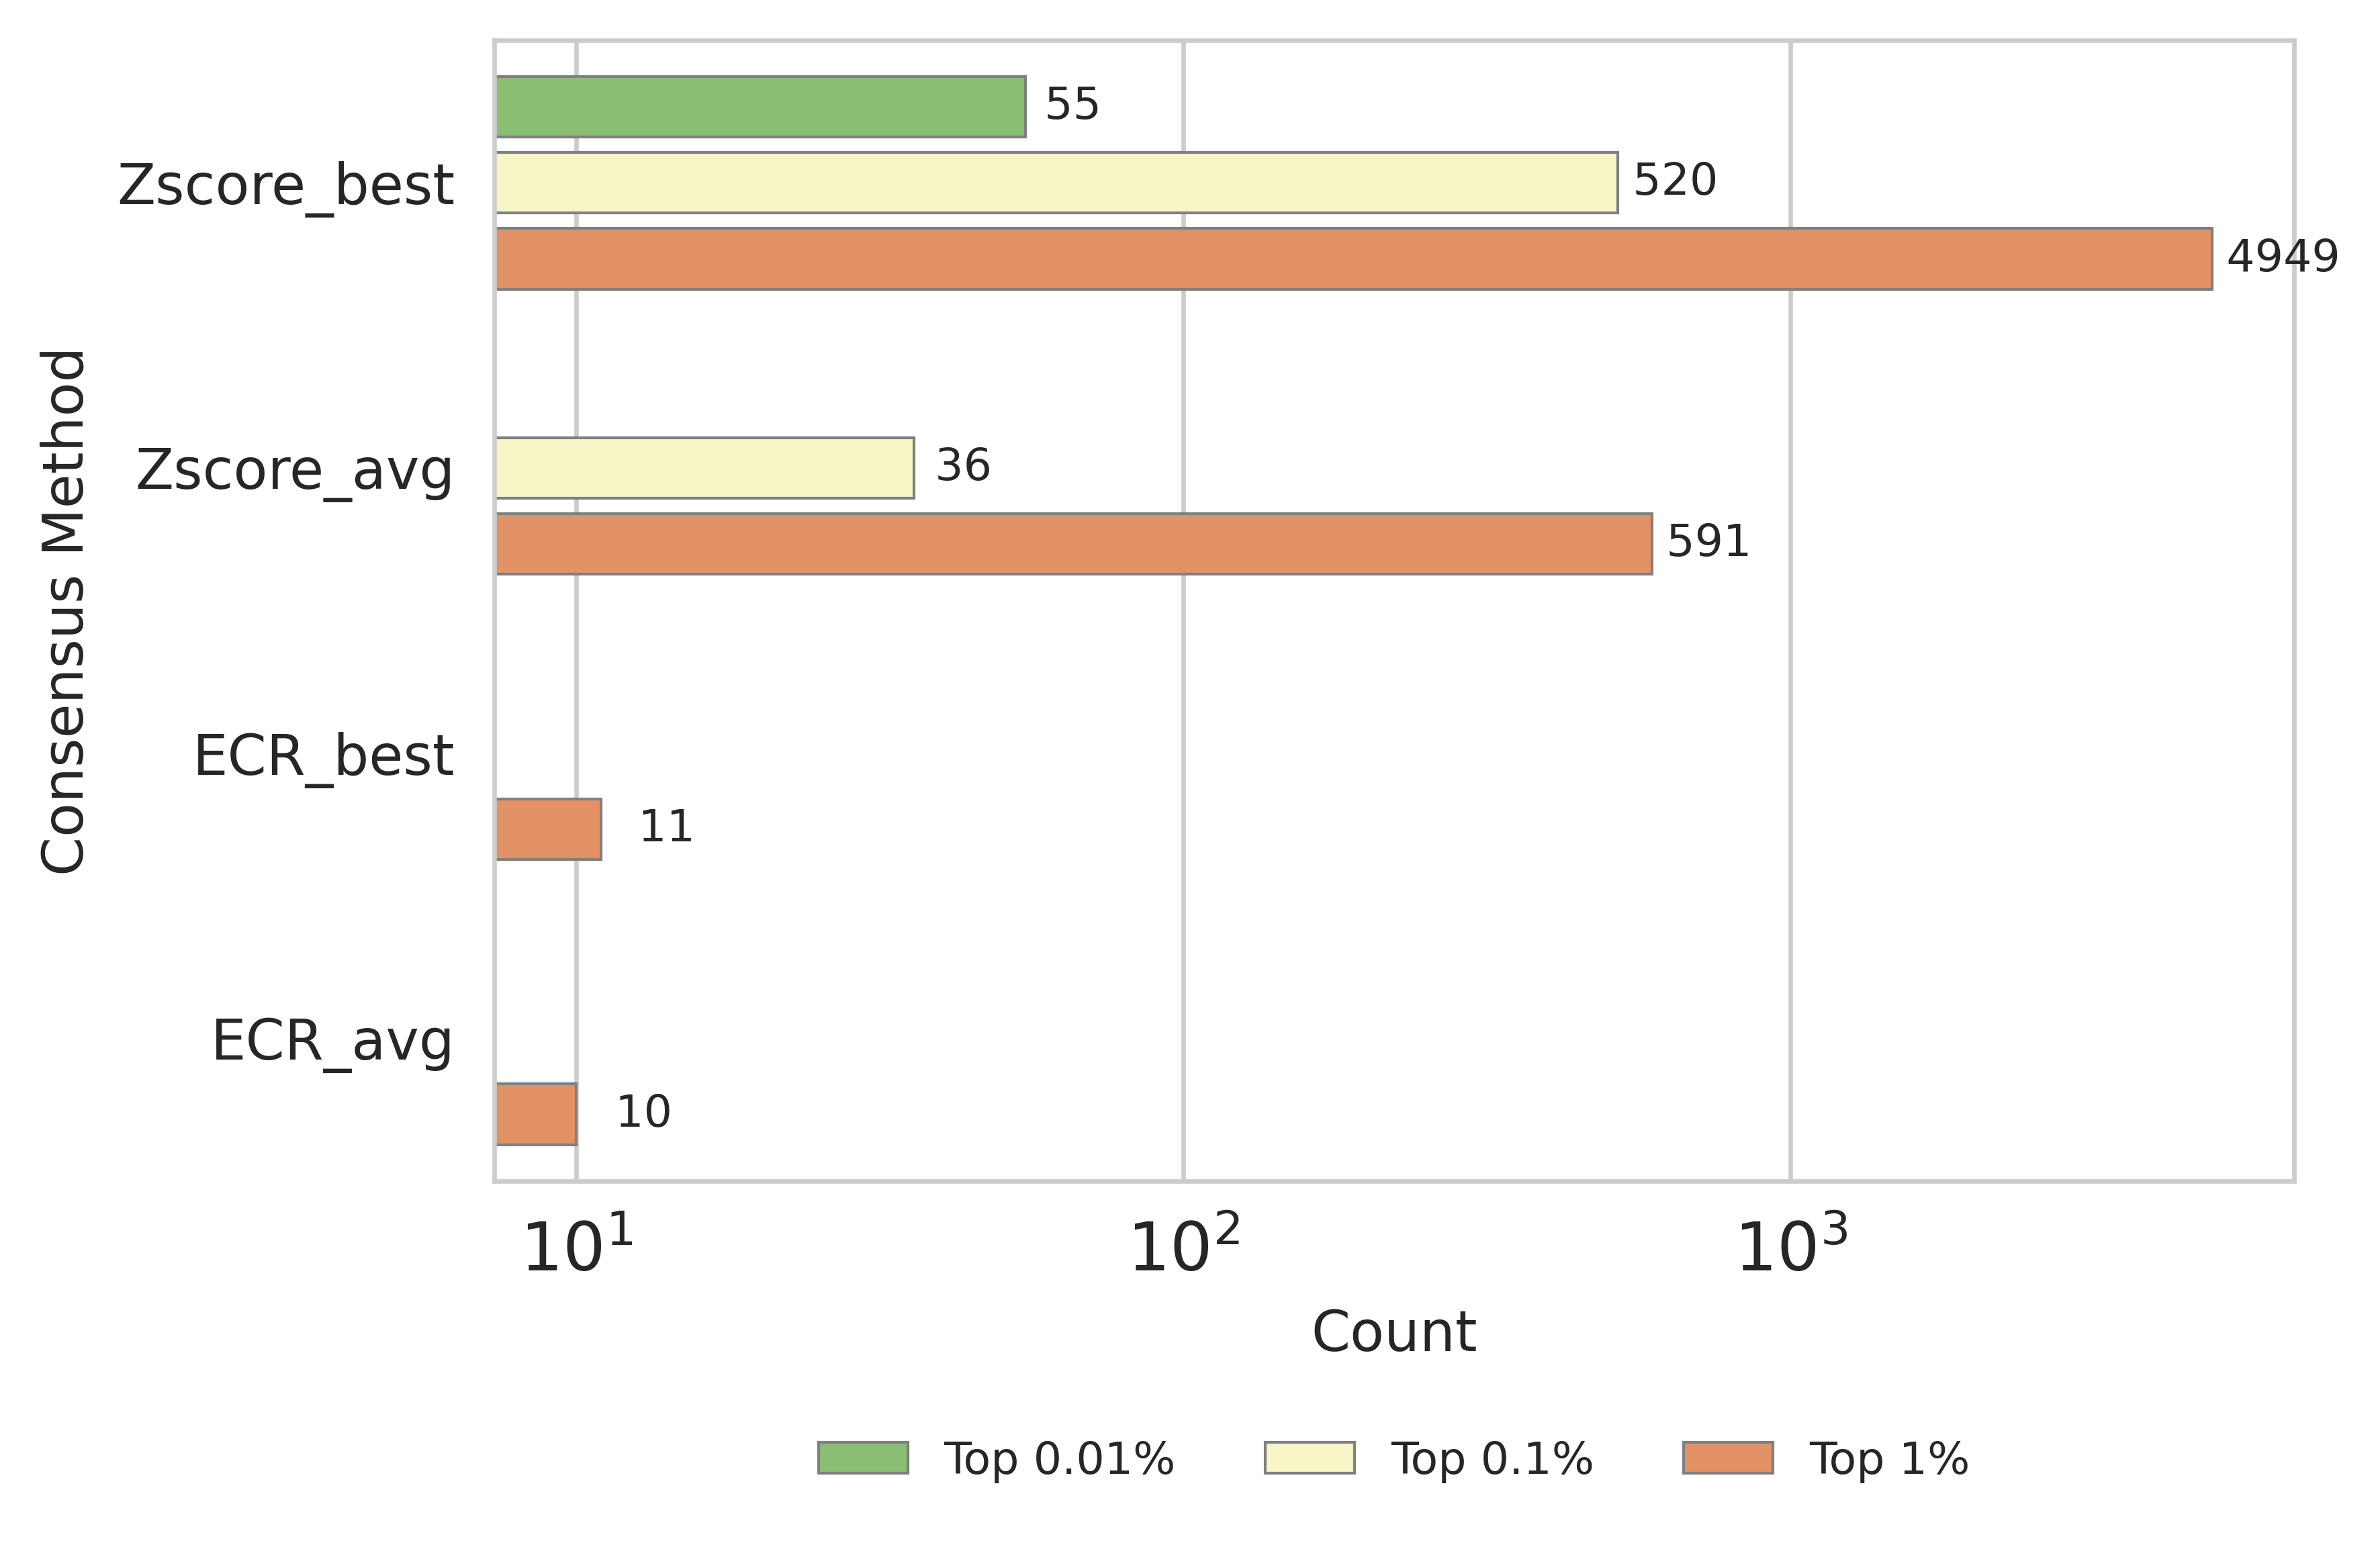

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4), dpi=600)

# Plotting the count data
ax = sns.barplot(x='Count', 
                 y='Consensus', 
                 hue='Percentile', 
                 data=combined_dude_consensus_df, 
                 palette="RdYlGn_r", 
                 width=0.8,
                 gap=0.2,
                 edgecolor='grey',
                 linewidth=0.5)
plt.xscale('log')

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel('Count')
plt.ylabel('Consensus Method')
plt.xticks(fontsize=12)
plt.legend(loc='lower center',
           fontsize=8,
           frameon=False,
           ncol=4, 
           bbox_to_anchor=(0.5, -0.3))
plt.tight_layout()

# Save and show the plot
plt.savefig("./DUD-E_consensus_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()


In [22]:
# Count occurrences in 'consensus' for both subsets
dude_clustering_counts_1 = dude_top_1_percent['clustering'].value_counts(dropna=False).fillna(0)
dude_clustering_counts_01 = dude_top_01_percent['clustering'].value_counts(dropna=False).fillna(0)
dude_clustering_counts_001 = dude_top_001_percent['clustering'].value_counts(dropna=False).fillna(0)

# Convert counts to DataFrame for plotting
dude_clustering_df_1 = dude_clustering_counts_1.reset_index()
dude_clustering_df_1.columns = ['Clustering', 'Count']
dude_clustering_df_01 = dude_clustering_counts_01.reset_index()
dude_clustering_df_01.columns = ['Clustering', 'Count']
dude_clustering_df_001 = dude_clustering_counts_001.reset_index()
dude_clustering_df_001.columns = ['Clustering', 'Count']

# Combine for comparison in one plot
dude_clustering_df_1['Percentile'] = 'Top 1%'
dude_clustering_df_01['Percentile'] = 'Top 0.1%'
dude_clustering_df_001['Percentile'] = 'Top 0.01%'
combined_dude_clustering_df = pd.concat([dude_clustering_df_001, dude_clustering_df_01, dude_clustering_df_1]).reset_index(drop=True)

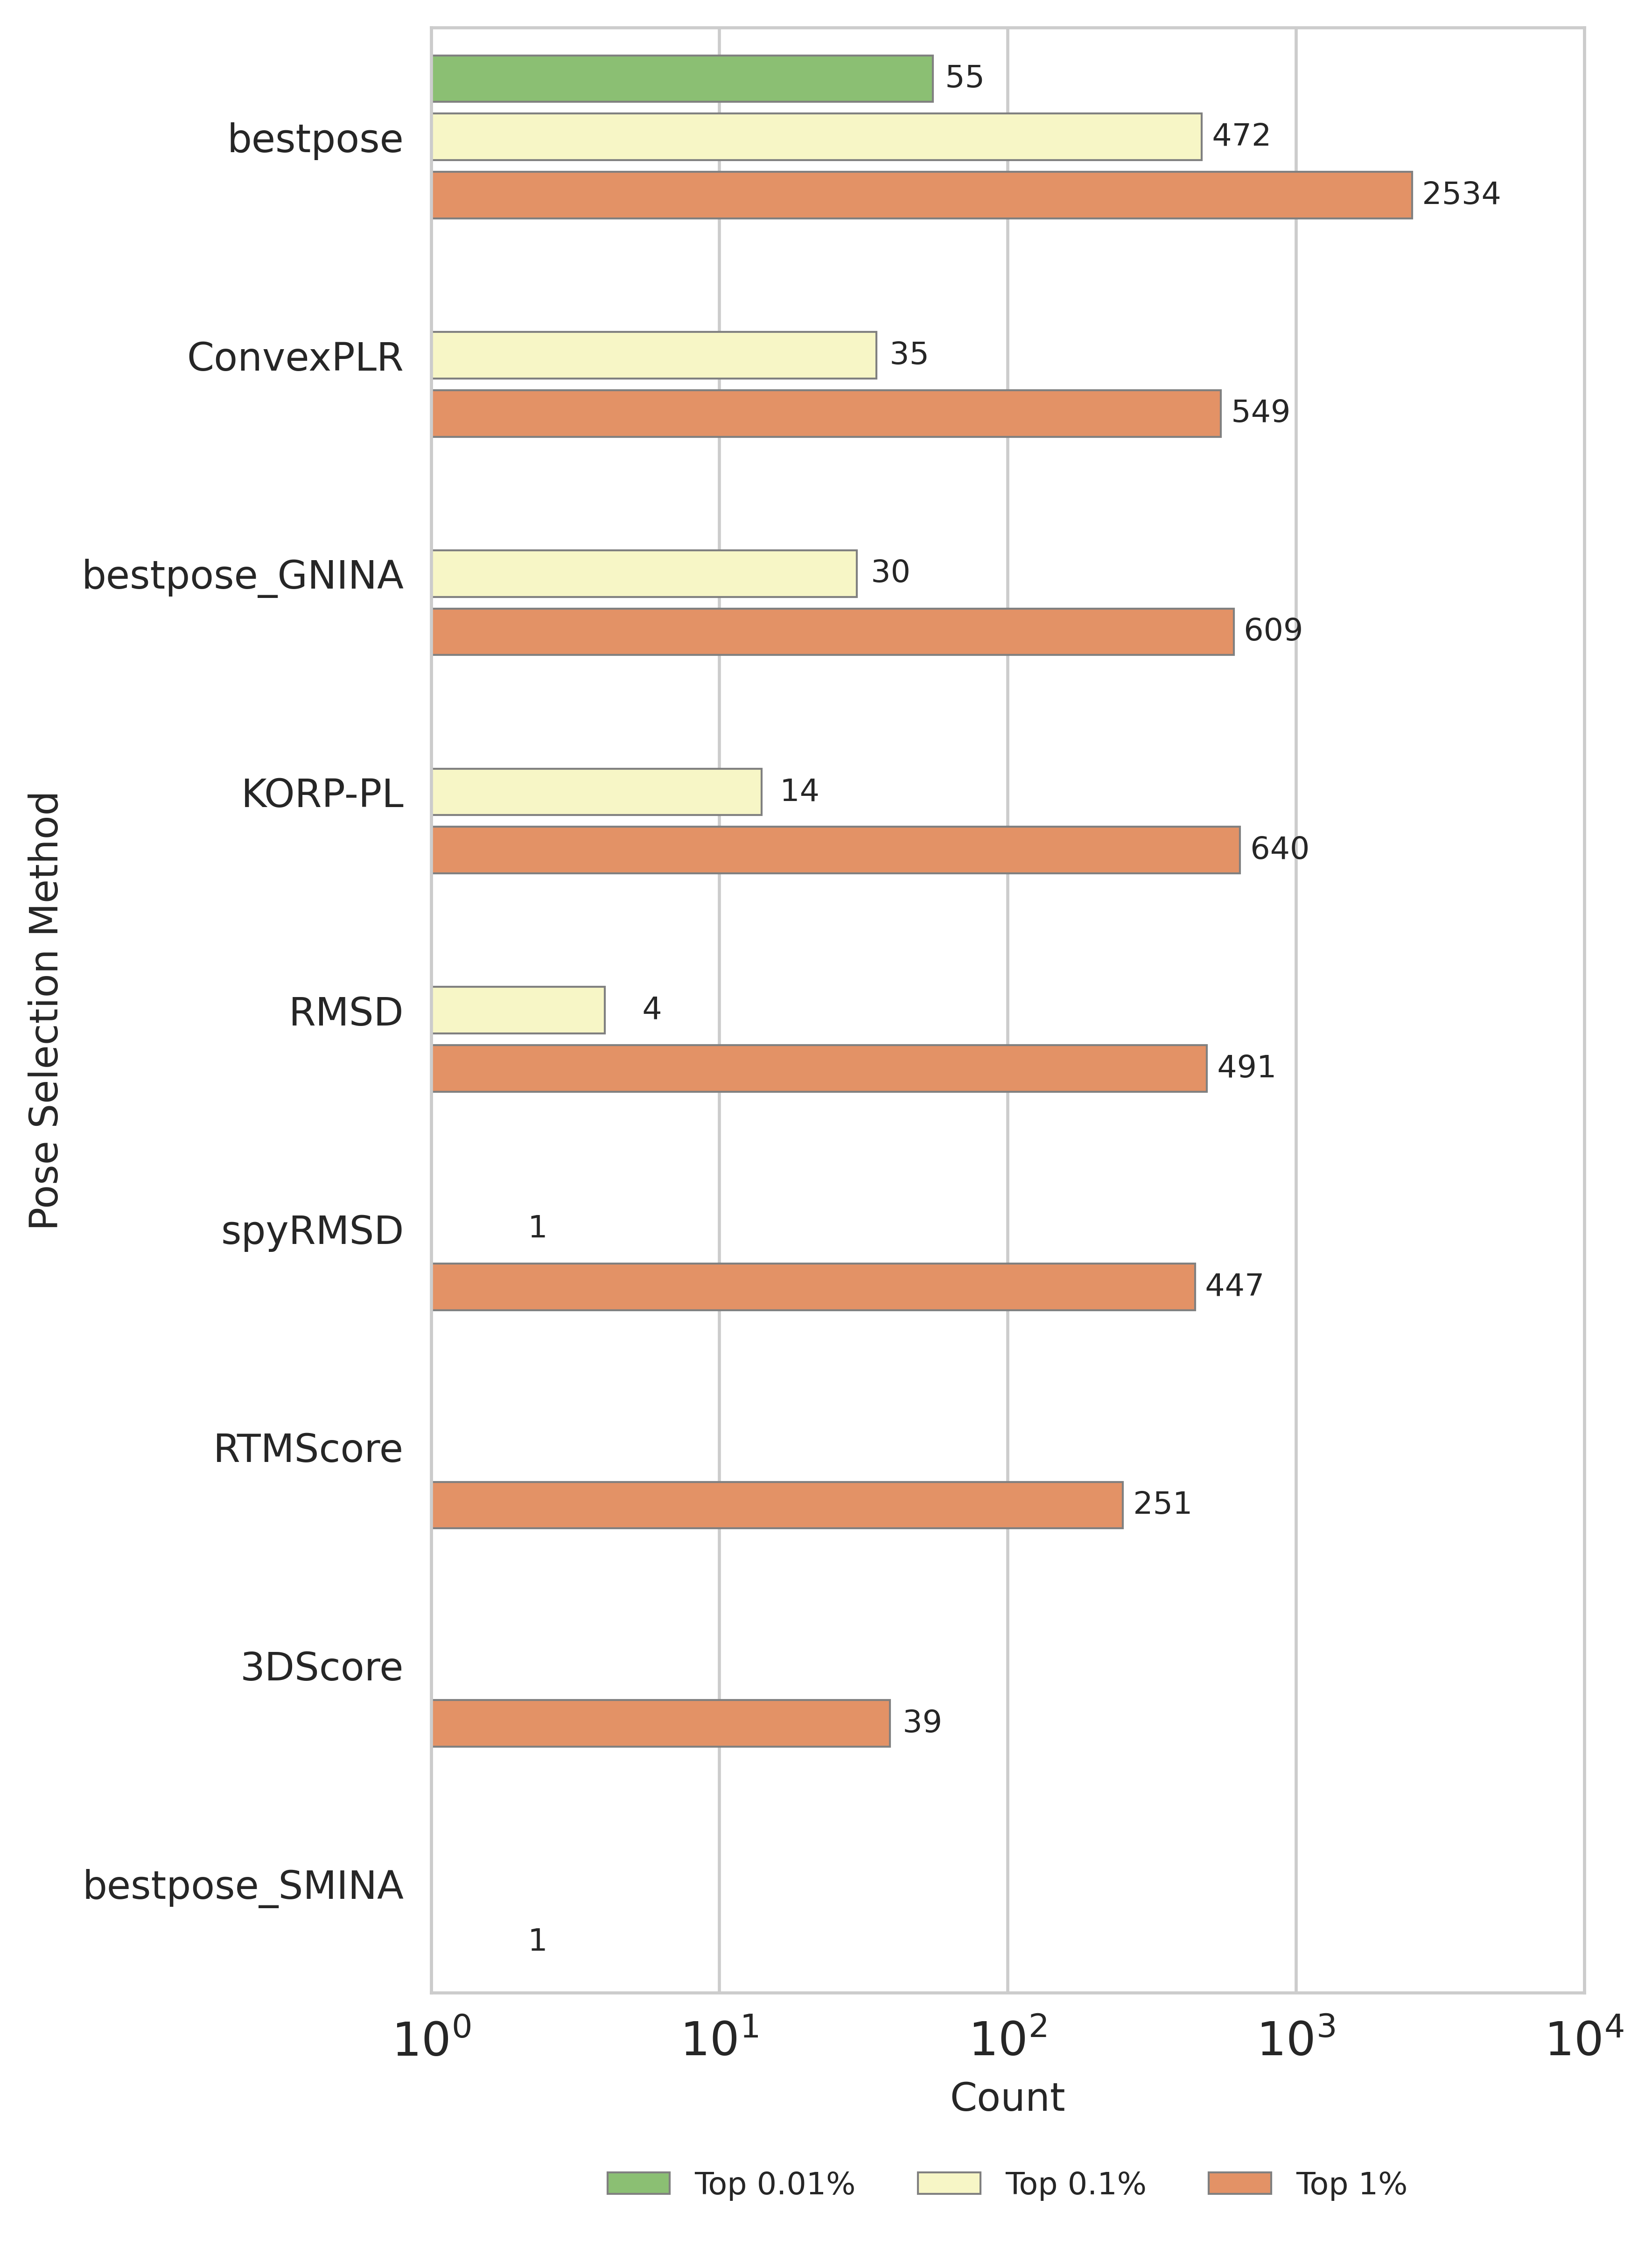

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)

# Plotting the count data
ax = sns.barplot(x='Count', 
                 y='Clustering', 
                 hue='Percentile', 
                 data=combined_dude_clustering_df, 
                 palette="RdYlGn_r", 
                 width=0.8,
                 gap=0.2,
                 edgecolor='grey',
                 linewidth=0.5)
plt.xscale('log')
plt.xlim(1, 10000)

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel('Count')
plt.ylabel('Pose Selection Method')
plt.xticks(fontsize=12)
plt.legend(loc='lower center',
           fontsize=8,
           frameon=False,
           ncol=4, 
           bbox_to_anchor=(0.5, -0.12))
plt.tight_layout()

# Save and show the plot
plt.savefig("./DUD-E_clustering_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()


In [24]:
# Function to split the 'scoring' column and count occurrences
def count_sf_functions(df):
    dude_scoring_functions = df['scoring'].str.split('_', expand=True).stack()
    return dude_scoring_functions.value_counts(dropna=False).fillna(0)

# Count occurrences in both subsets
dude_scoring_counts_1 = count_sf_functions(dude_top_1_percent)
dude_scoring_counts_01 = count_sf_functions(dude_top_01_percent)
dude_scoring_counts_001 = count_sf_functions(dude_top_001_percent)

# Convert counts to DataFrame for plotting
dude_scoring_df_1 = dude_scoring_counts_1.reset_index()
dude_scoring_df_1.columns = ['Scoring Function', 'Count']
dude_scoring_df_01 = dude_scoring_counts_01.reset_index()
dude_scoring_df_01.columns = ['Scoring Function', 'Count']
dude_scoring_df_001 = dude_scoring_counts_001.reset_index()
dude_scoring_df_001.columns = ['Scoring Function', 'Count']

# Combine for comparison in one plot
dude_scoring_df_1['Percentile'] = 'Top 1%'
dude_scoring_df_01['Percentile'] = 'Top 0.1%'
dude_scoring_df_001['Percentile'] = 'Top 0.01%'
combined_dude_scoring_df = pd.concat([dude_scoring_df_001, dude_scoring_df_01, dude_scoring_df_1]).reset_index(drop=True)

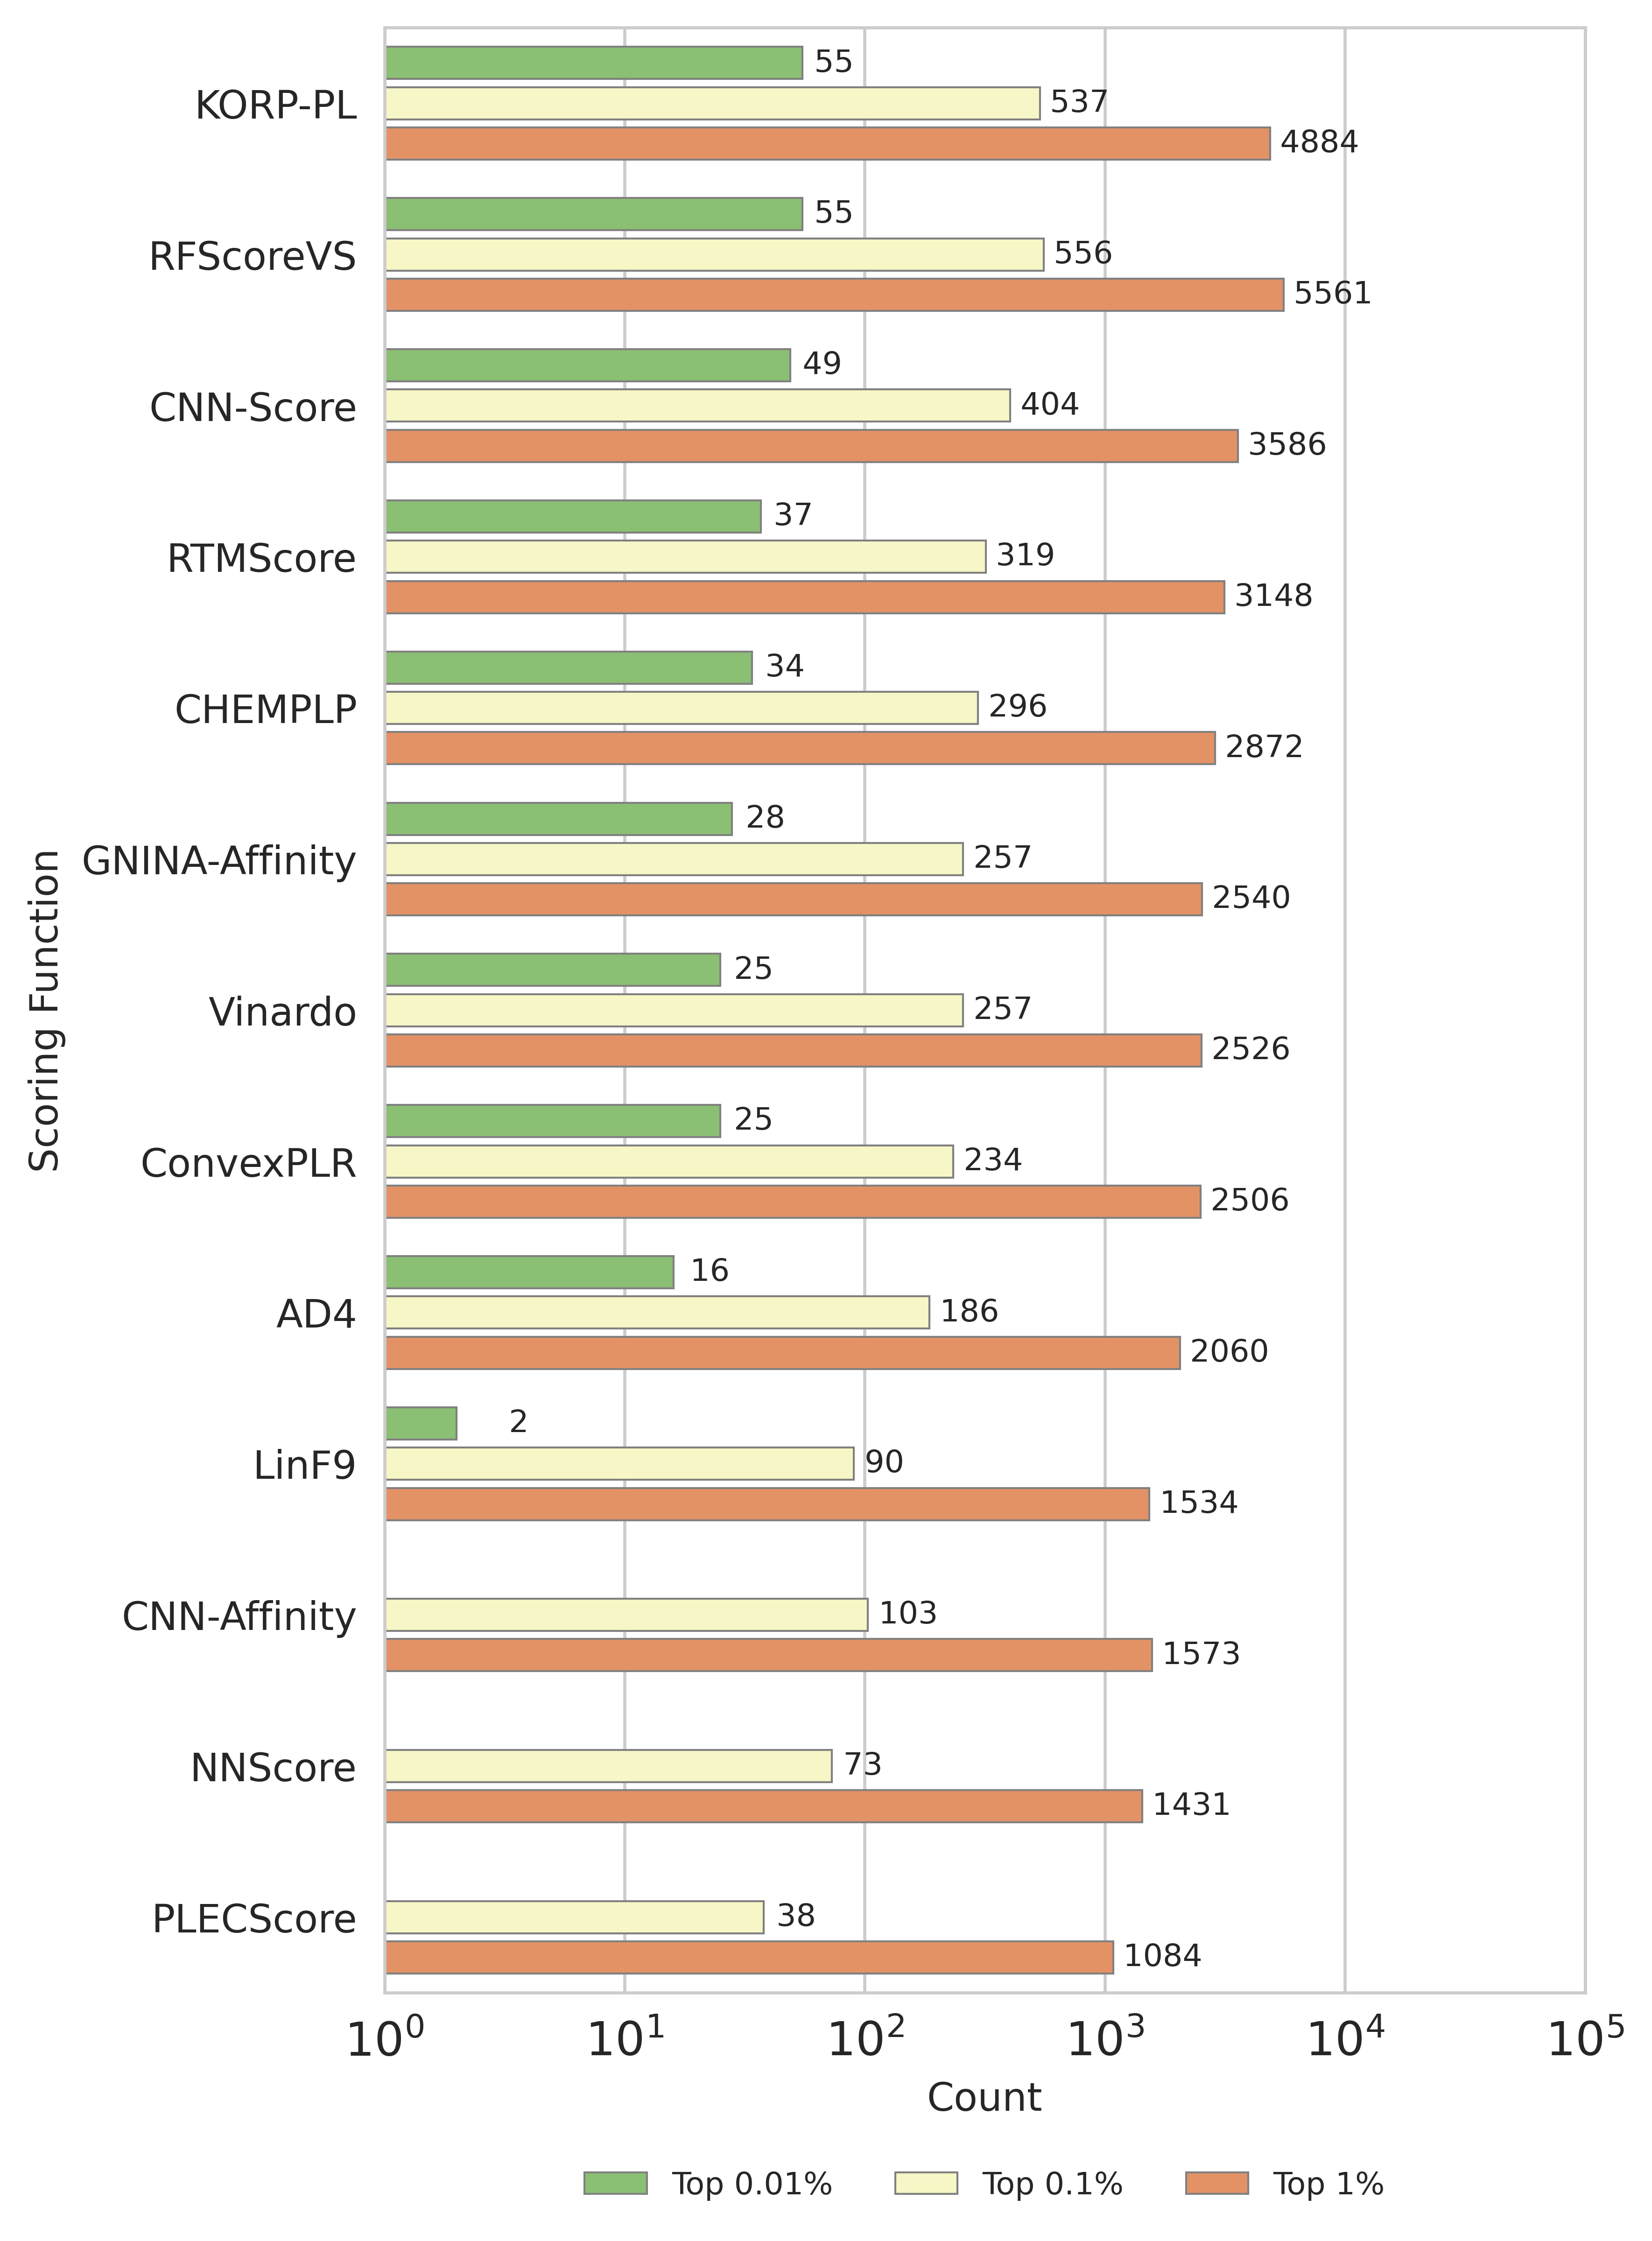

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)

# Plotting the count data
ax = sns.barplot(x='Count', 
                 y='Scoring Function', 
                 hue='Percentile', 
                 data=combined_dude_scoring_df, 
                 palette="RdYlGn_r", 
                 width=0.8,
                 gap=0.2,
                 edgecolor='grey',
                 linewidth=0.5)
plt.xscale('log')

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel('Count')
plt.ylabel('Scoring Function')
plt.xticks(fontsize=12)
plt.legend(loc='lower center',
           fontsize=8,
           frameon=False,
           ncol=4, 
           bbox_to_anchor=(0.5, -0.12))
plt.xlim(1, 100000)
plt.tight_layout()

# Save and show the plot
plt.savefig("./DUD-E_SF_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()


In [26]:
def get_number_of_scoring_functions(df):
    numbers = df['scoring'].apply(lambda x: str(x.count('_')+1) if '_' in x else str(1))
    return numbers.value_counts(dropna=False).fillna(0)

# Count occurrences in both subsets
dude_scoringnumber_counts_1 = get_number_of_scoring_functions(dude_top_1_percent)
dude_scoringnumber_counts_01 = get_number_of_scoring_functions(dude_top_01_percent)
dude_scoringnumber_counts_001 = get_number_of_scoring_functions(dude_top_001_percent)

# Convert counts to DataFrame for plotting
dude_scoringnumber_df_1 = dude_scoringnumber_counts_1.reset_index()
dude_scoringnumber_df_1.columns = ['Amount of Scoring Functions', 'Count']
dude_scoringnumber_df_01 = dude_scoringnumber_counts_01.reset_index()
dude_scoringnumber_df_01.columns = ['Amount of Scoring Functions', 'Count']
dude_scoringnumber_df_001 = dude_scoringnumber_counts_001.reset_index()
dude_scoringnumber_df_001.columns = ['Amount of Scoring Functions', 'Count']

# Combine for comparison in one plot
dude_scoringnumber_df_1['Percentile'] = 'Top 1%'
dude_scoringnumber_df_01['Percentile'] = 'Top 0.1%'
dude_scoringnumber_df_001['Percentile'] = 'Top 0.01%'
combined_dude_scoringnumber_df = pd.concat([dude_scoringnumber_df_001, dude_scoringnumber_df_01, dude_scoringnumber_df_1]).reset_index(drop=True)

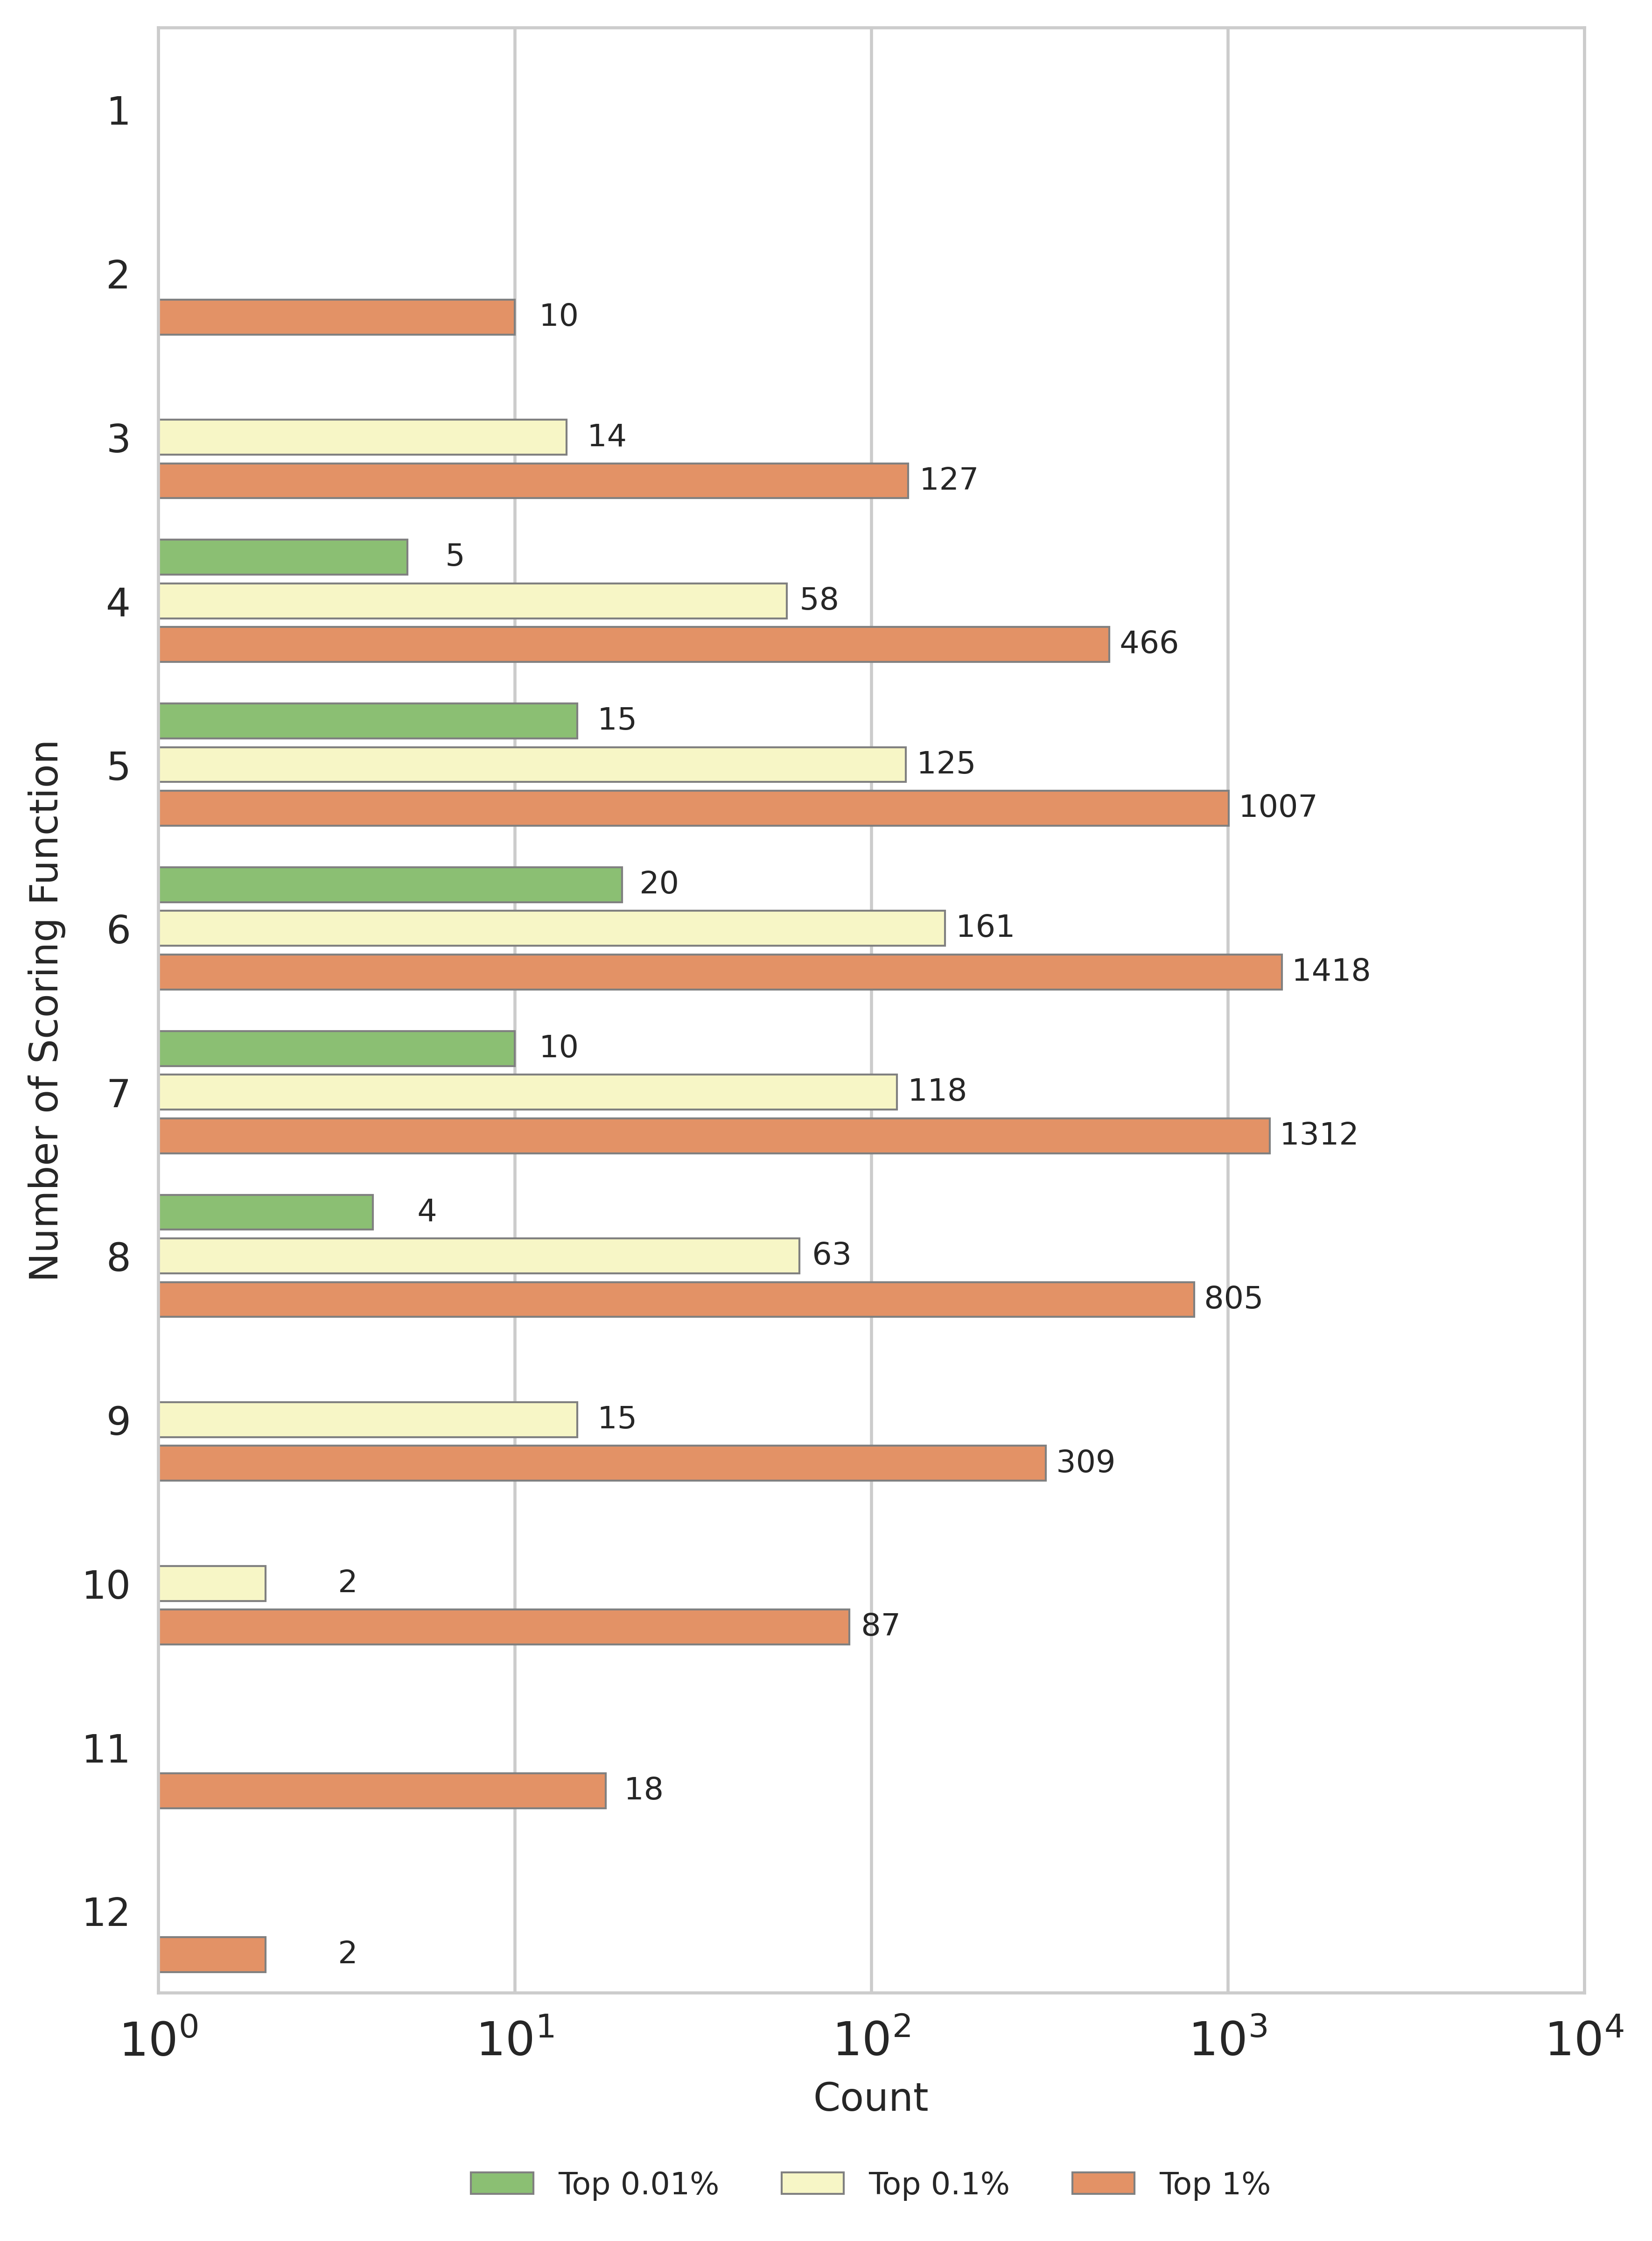

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 8), dpi=600)

# Plotting the count data
ax = sns.barplot(x='Count', 
                 y='Amount of Scoring Functions', 
                 hue='Percentile', 
                 data=combined_dude_scoringnumber_df, 
                 order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
                 palette="RdYlGn_r", 
                 width=0.8,
                 gap=0.2,
                 edgecolor='grey',
                 linewidth=0.5)
plt.xscale('log')

for p in ax.patches:
    width = p.get_width()
    if width > 1:
        ax.text(width + 1,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel('Count')
plt.ylabel('Number of Scoring Function')
plt.xticks(fontsize=12)
plt.legend(loc='lower center',
           fontsize=8,
           frameon=False,
           ncol=4, 
           bbox_to_anchor=(0.5, -0.12))
plt.xlim(1, 10000)
plt.tight_layout()

# Save and show the plot
plt.savefig("./DUD-E_SF_number_counts.png", transparent=False, bbox_inches="tight")
plt.show()


In [29]:
# Define your data for EF at 1%
litpcba_sf_data_ef1 = pd.read_csv('./Lit-PCBA_RESULTS/results_dockm8_EF_1%.csv')
litpcba_sf_data_ef1['Average'] = litpcba_sf_data_ef1.iloc[:, 4:].mean(axis=1)
litpcba_sf_data_ef1.sort_values('Average', ascending=False)
litpcba_top_1_percent = litpcba_sf_data_ef1.nlargest(int(len(litpcba_sf_data_ef1) * 0.01), 'Average')
litpcba_top_01_percent = litpcba_sf_data_ef1.nlargest(int(len(litpcba_sf_data_ef1) * 0.001), 'Average')
litpcba_top_001_percent = litpcba_sf_data_ef1.nlargest(int(len(litpcba_sf_data_ef1) * 0.0001), 'Average')


In [30]:
# Count occurrences in 'consensus' for both subsets
litpcba_consensus_counts_1 = litpcba_top_1_percent['consensus'].value_counts(dropna=False).fillna(0)
litpcba_consensus_counts_01 = litpcba_top_01_percent['consensus'].value_counts(dropna=False).fillna(0)
litpcba_consensus_counts_001 = litpcba_top_001_percent['consensus'].value_counts(dropna=False).fillna(0)

# Convert counts to DataFrame for plotting
litpcba_consensus_df_1 = litpcba_consensus_counts_1.reset_index()
litpcba_consensus_df_1.columns = ['Consensus', 'Count']
litpcba_consensus_df_01 = litpcba_consensus_counts_01.reset_index()
litpcba_consensus_df_01.columns = ['Consensus', 'Count']
litpcba_consensus_df_001 = litpcba_consensus_counts_001.reset_index()
litpcba_consensus_df_001.columns = ['Consensus', 'Count']

# Combine for comparison in one plot
litpcba_consensus_df_1['Percentile'] = 'Top 1%'
litpcba_consensus_df_01['Percentile'] = 'Top 0.1%'
litpcba_consensus_df_001['Percentile'] = 'Top 0.01%'
combined_litpcba_consensus_df = pd.concat([litpcba_consensus_df_001, litpcba_consensus_df_01, litpcba_consensus_df_1]).reset_index(drop=True)


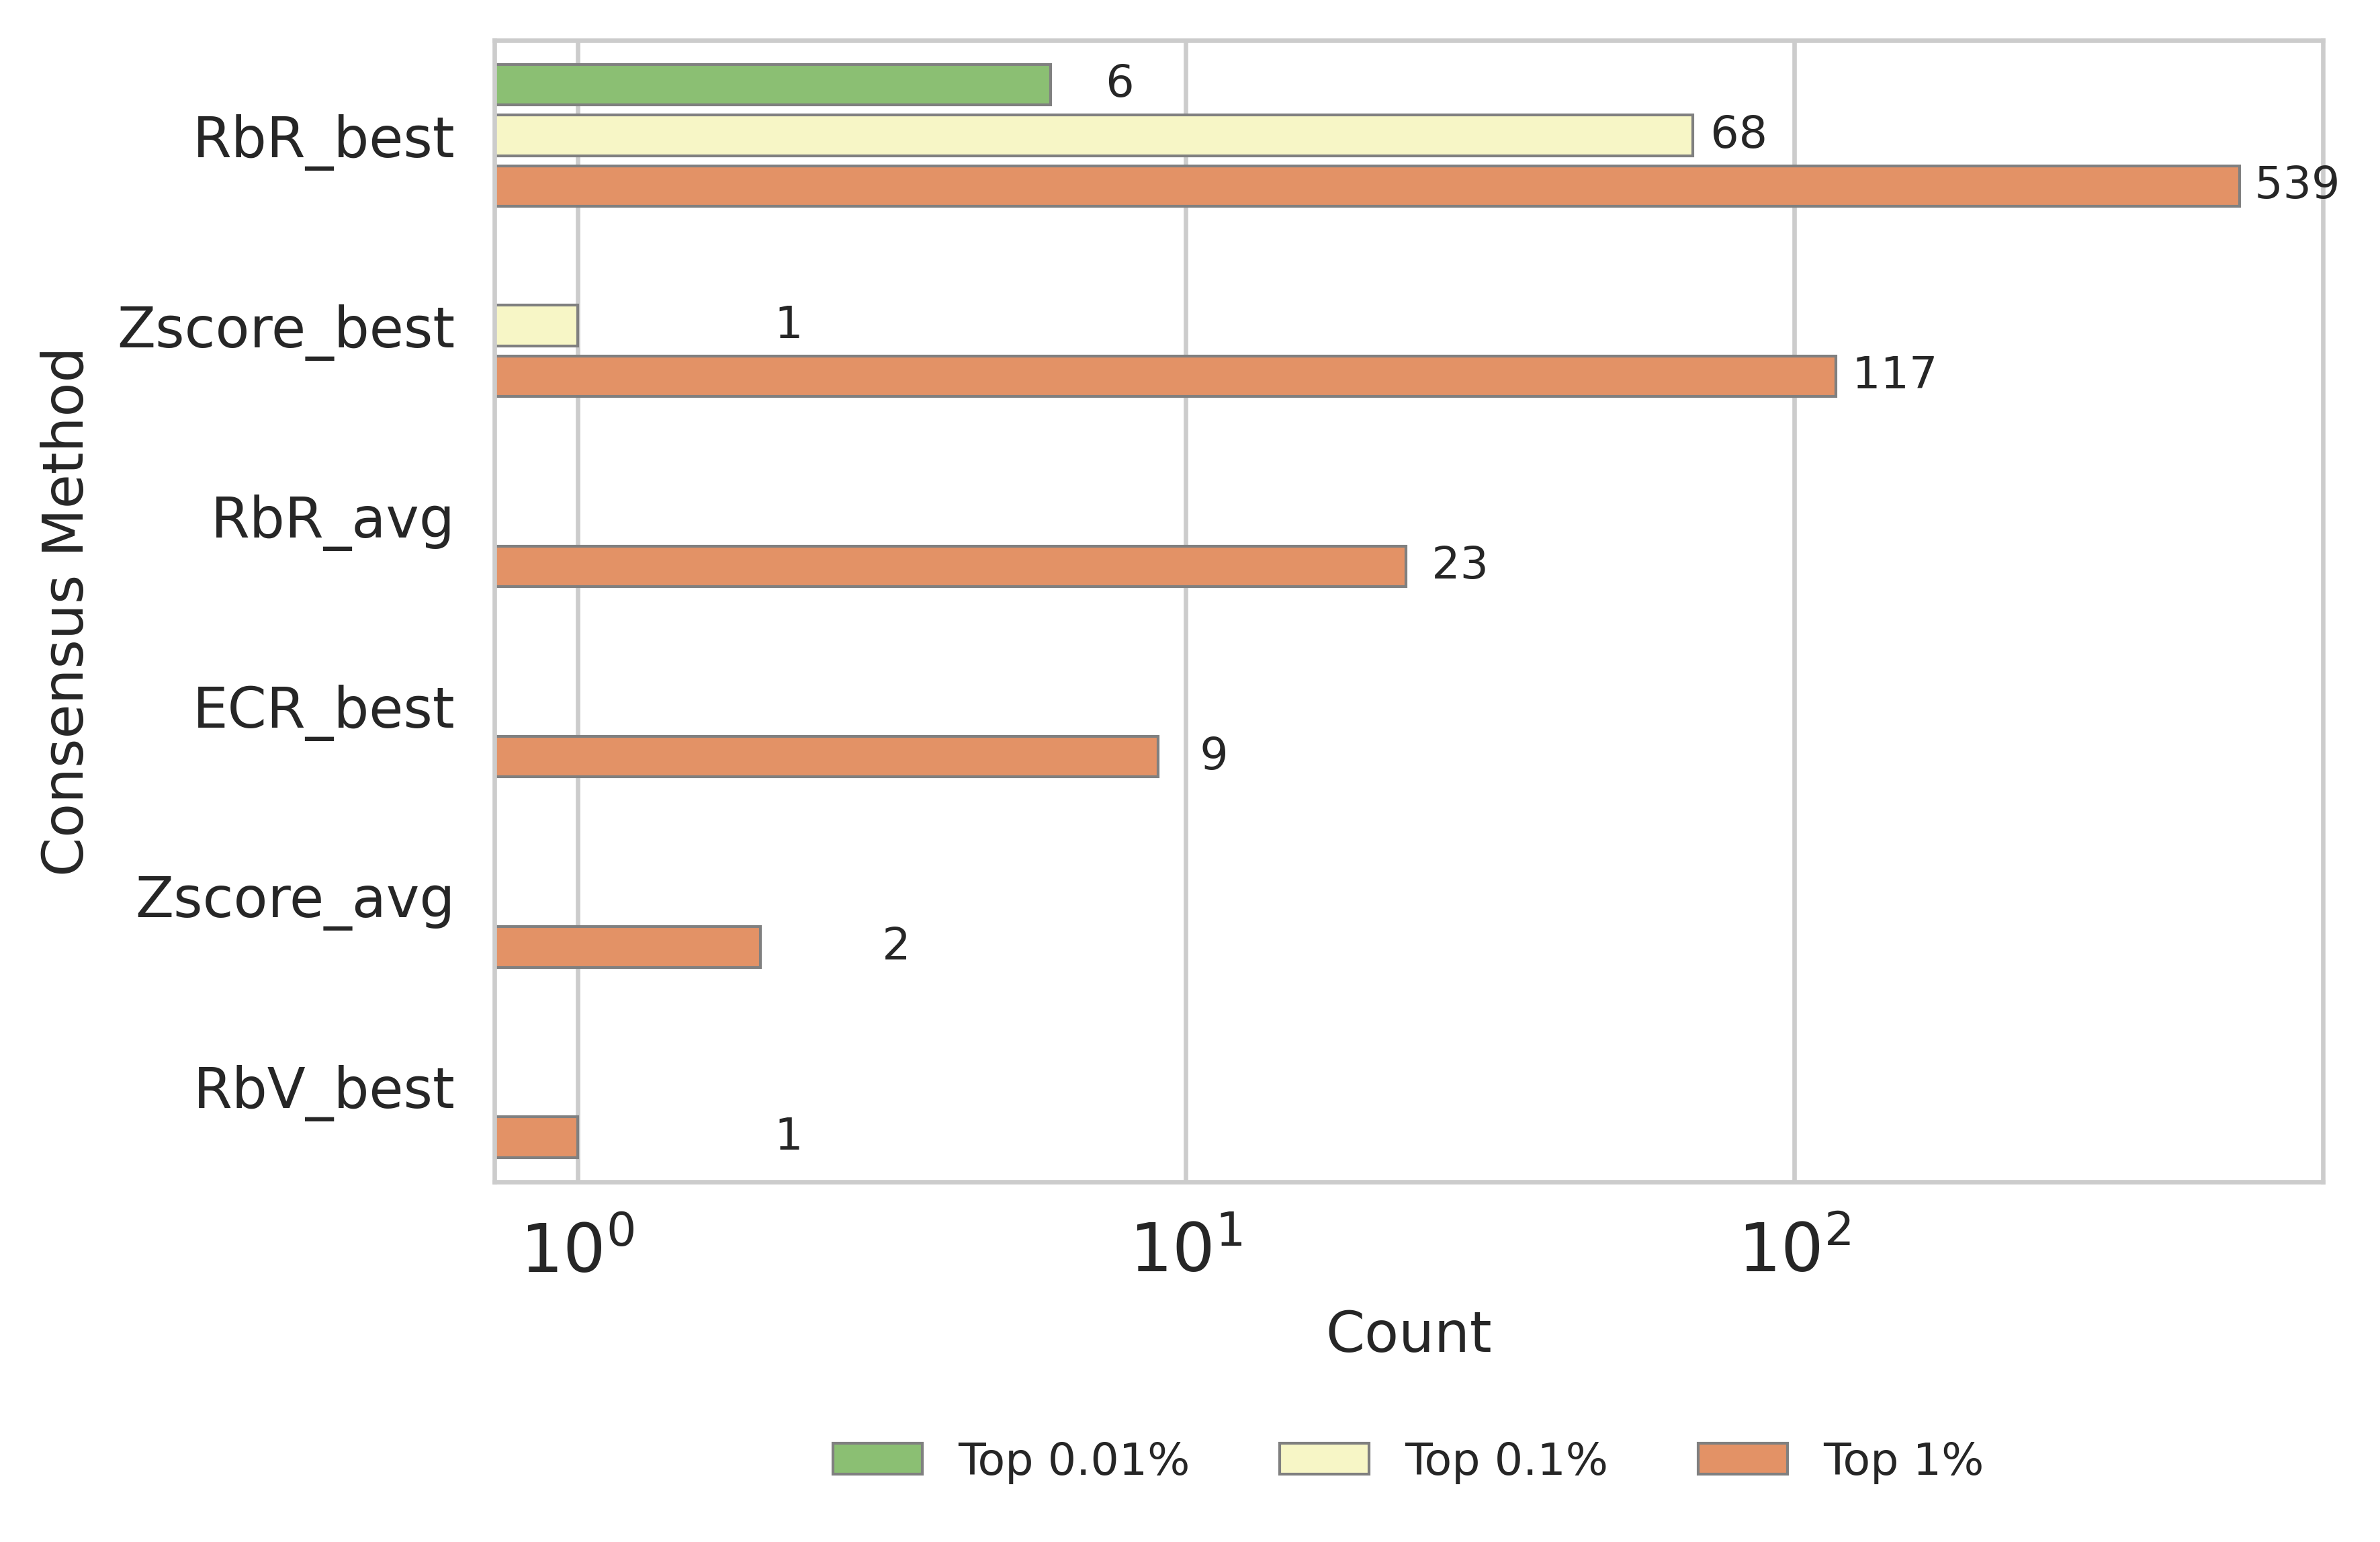

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4), dpi=600)

# Plotting the count data
ax = sns.barplot(x='Count', 
                 y='Consensus', 
                 hue='Percentile', 
                 data=combined_litpcba_consensus_df, 
                 palette="RdYlGn_r", 
                 width=0.8,
                 gap=0.2,
                 edgecolor='grey',
                 linewidth=0.5)
plt.xscale('log')

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel('Count')
plt.ylabel('Consensus Method')
plt.xticks(fontsize=12)
plt.legend(loc='lower center',
           fontsize=8,
           frameon=False,
           ncol=4, 
           bbox_to_anchor=(0.5, -0.3))
plt.tight_layout()

# Save and show the plot
plt.savefig("./litpcba_consensus_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()


In [32]:
# Count occurrences in 'consensus' for both subsets
litpcba_clustering_counts_1 = litpcba_top_1_percent['clustering'].value_counts(dropna=False).fillna(0)
litpcba_clustering_counts_01 = litpcba_top_01_percent['clustering'].value_counts(dropna=False).fillna(0)
litpcba_clustering_counts_001 = litpcba_top_001_percent['clustering'].value_counts(dropna=False).fillna(0)

# Convert counts to DataFrame for plotting
litpcba_clustering_df_1 = litpcba_clustering_counts_1.reset_index()
litpcba_clustering_df_1.columns = ['Clustering', 'Count']
litpcba_clustering_df_01 = litpcba_clustering_counts_01.reset_index()
litpcba_clustering_df_01.columns = ['Clustering', 'Count']
litpcba_clustering_df_001 = litpcba_clustering_counts_001.reset_index()
litpcba_clustering_df_001.columns = ['Clustering', 'Count']

# Combine for comparison in one plot
litpcba_clustering_df_1['Percentile'] = 'Top 1%'
litpcba_clustering_df_01['Percentile'] = 'Top 0.1%'
litpcba_clustering_df_001['Percentile'] = 'Top 0.01%'
combined_litpcba_clustering_df = pd.concat([litpcba_clustering_df_001, litpcba_clustering_df_01, litpcba_clustering_df_1]).reset_index(drop=True)


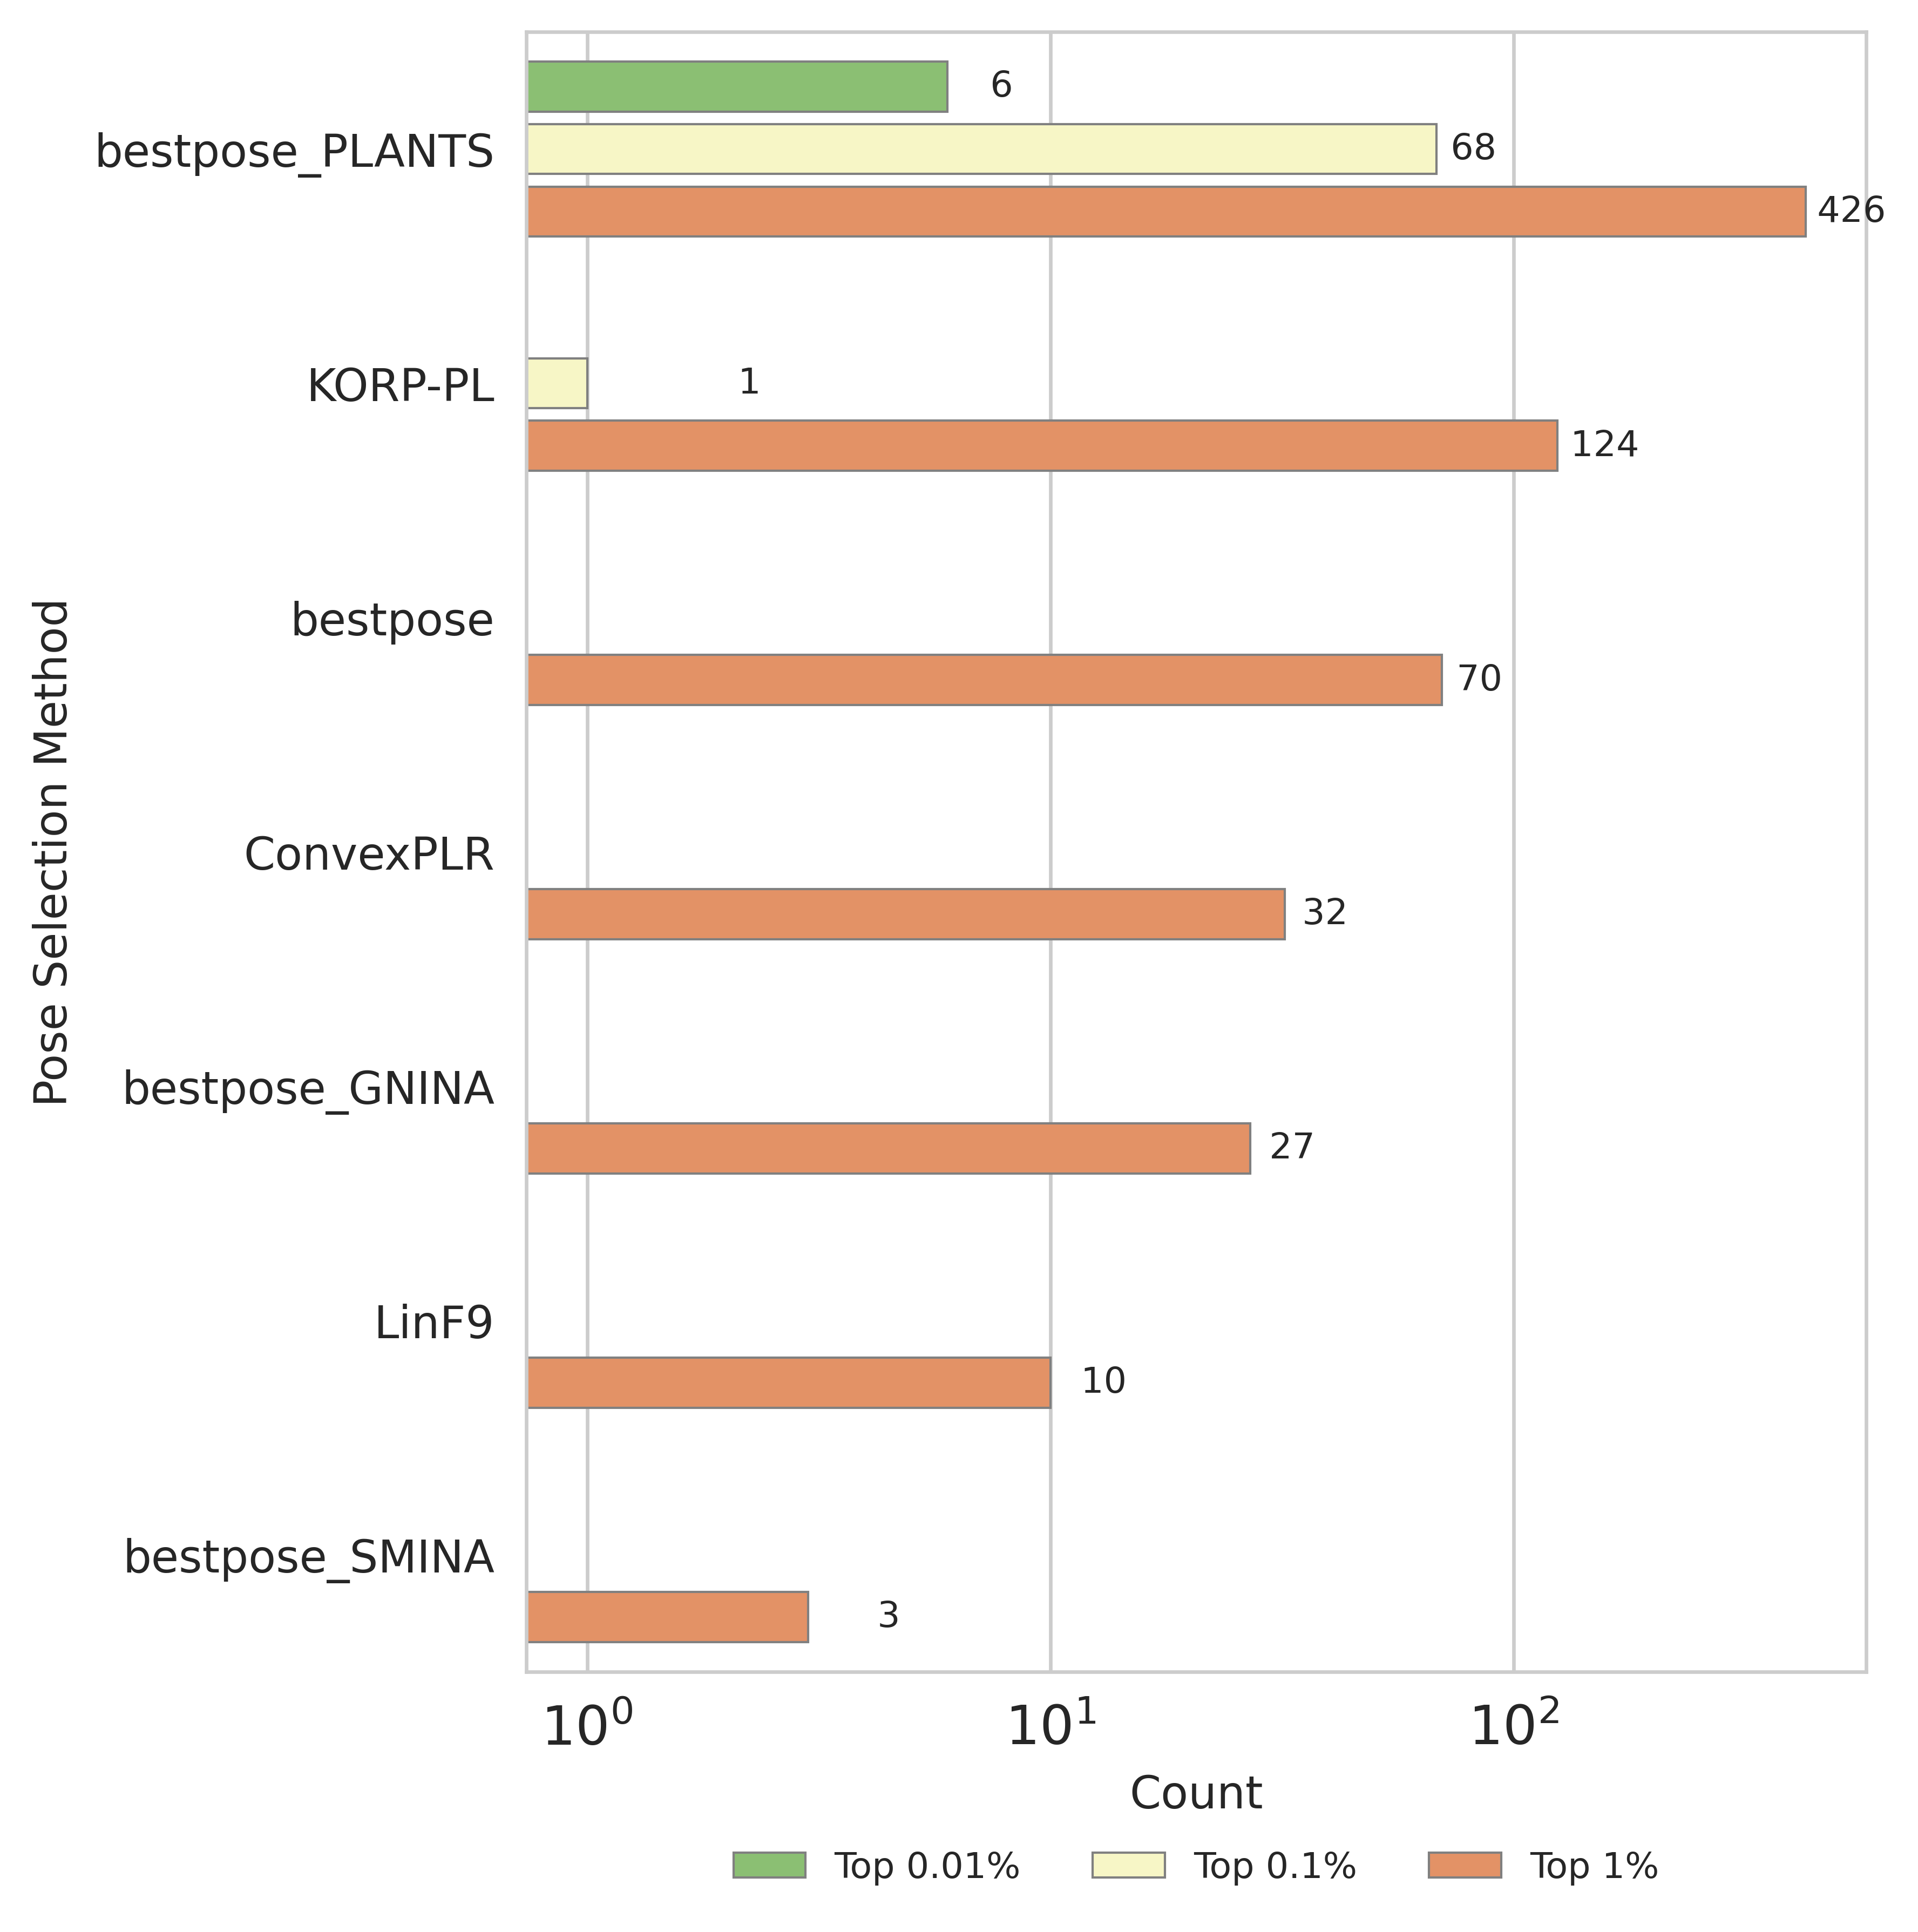

In [33]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6), dpi=600)

# Plotting the count data
ax = sns.barplot(x='Count', 
                 y='Clustering', 
                 hue='Percentile', 
                 data=combined_litpcba_clustering_df, 
                 palette="RdYlGn_r", 
                 width=0.8,
                 gap=0.2,
                 edgecolor='grey',
                 linewidth=0.5)
plt.xscale('log')

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel('Count')
plt.ylabel('Pose Selection Method')
plt.xticks(fontsize=12)
plt.legend(loc='lower center',
           fontsize=8,
           frameon=False,
           ncol=4, 
           bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()

# Save and show the plot
plt.savefig("./litpcba_clustering_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()


In [34]:
# Function to split the 'scoring' column and count occurrences
def count_sf_functions(df):
    litpcba_scoring_functions = df['scoring'].str.split('_', expand=True).stack()
    return litpcba_scoring_functions.value_counts(dropna=False).fillna(0)

# Count occurrences in both subsets
litpcba_scoring_counts_1 = count_sf_functions(litpcba_top_1_percent)
litpcba_scoring_counts_01 = count_sf_functions(litpcba_top_01_percent)
litpcba_scoring_counts_001 = count_sf_functions(litpcba_top_001_percent)

# Convert counts to DataFrame for plotting
litpcba_scoring_df_1 = litpcba_scoring_counts_1.reset_index()
litpcba_scoring_df_1.columns = ['Scoring Function', 'Count']
litpcba_scoring_df_01 = litpcba_scoring_counts_01.reset_index()
litpcba_scoring_df_01.columns = ['Scoring Function', 'Count']
litpcba_scoring_df_001 = litpcba_scoring_counts_001.reset_index()
litpcba_scoring_df_001.columns = ['Scoring Function', 'Count']

# Combine for comparison in one plot
litpcba_scoring_df_1['Percentile'] = 'Top 1%'
litpcba_scoring_df_01['Percentile'] = 'Top 0.1%'
litpcba_scoring_df_001['Percentile'] = 'Top 0.01%'
combined_litpcba_scoring_df = pd.concat([litpcba_scoring_df_001, litpcba_scoring_df_01, litpcba_scoring_df_1]).reset_index(drop=True)

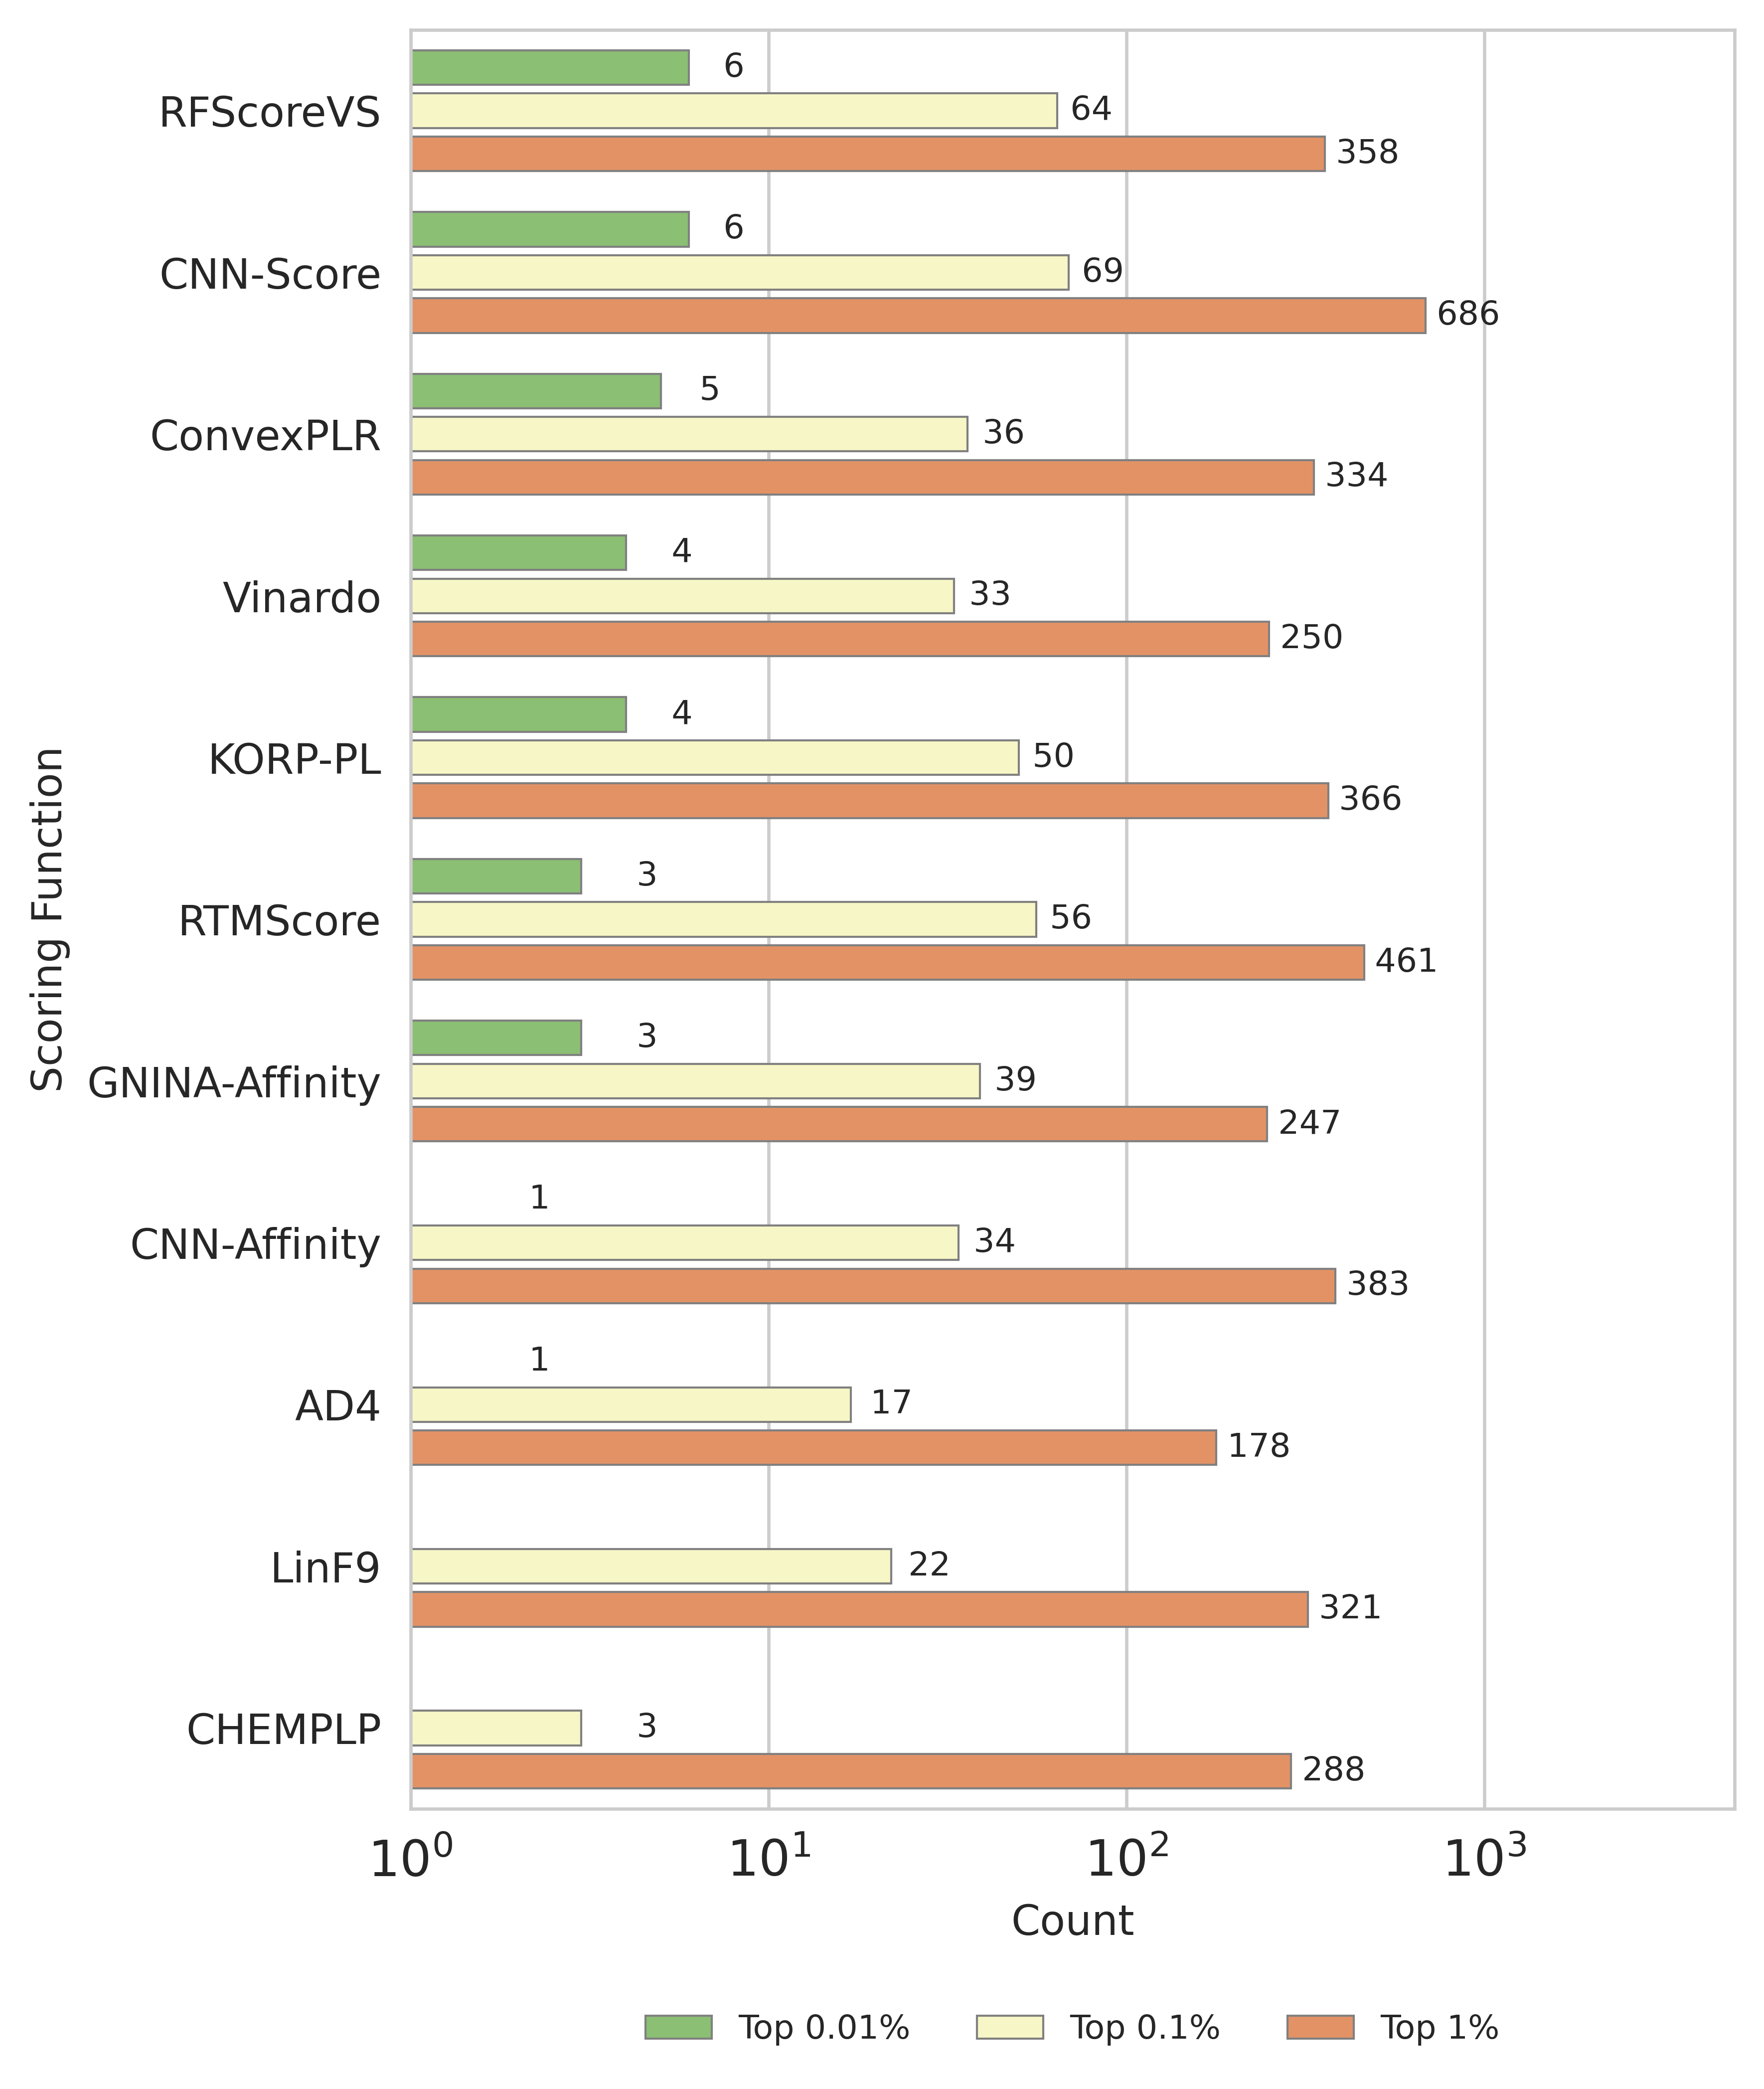

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 7), dpi=600)

# Plotting the count data
ax = sns.barplot(x='Count', 
                 y='Scoring Function', 
                 hue='Percentile', 
                 data=combined_litpcba_scoring_df, 
                 palette="RdYlGn_r", 
                 width=0.8,
                 gap=0.2,
                 edgecolor='grey',
                 linewidth=0.5)
plt.xscale('log')

for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 1,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel('Count')
plt.ylabel('Scoring Function')
plt.xticks(fontsize=12)
plt.xlim(1, 5000)
plt.legend(loc='lower center',
           fontsize=8,
           frameon=False,
           ncol=4, 
           bbox_to_anchor=(0.5, -0.15))
plt.tight_layout()

# Save and show the plot
plt.savefig("./litpcba_SF_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()


In [36]:
def get_number_of_scoring_functions(df):
    numbers = df['scoring'].apply(lambda x: str(x.count('_')+1) if '_' in x else str(1))
    return numbers.value_counts(dropna=False).fillna(0)

# Count occurrences in both subsets
litpcba_scoringnumber_counts_1 = get_number_of_scoring_functions(litpcba_top_1_percent)
litpcba_scoringnumber_counts_01 = get_number_of_scoring_functions(litpcba_top_01_percent)
litpcba_scoringnumber_counts_001 = get_number_of_scoring_functions(litpcba_top_001_percent)

# Convert counts to DataFrame for plotting
litpcba_scoringnumber_df_1 = litpcba_scoringnumber_counts_1.reset_index()
litpcba_scoringnumber_df_1.columns = ['Amount of Scoring Functions', 'Count']
litpcba_scoringnumber_df_01 = litpcba_scoringnumber_counts_01.reset_index()
litpcba_scoringnumber_df_01.columns = ['Amount of Scoring Functions', 'Count']
litpcba_scoringnumber_df_001 = litpcba_scoringnumber_counts_001.reset_index()
litpcba_scoringnumber_df_001.columns = ['Amount of Scoring Functions', 'Count']

# Combine for comparison in one plot
litpcba_scoringnumber_df_1['Percentile'] = 'Top 1%'
litpcba_scoringnumber_df_01['Percentile'] = 'Top 0.1%'
litpcba_scoringnumber_df_001['Percentile'] = 'Top 0.01%'
combined_litpcba_scoringnumber_df = pd.concat([litpcba_scoringnumber_df_001, litpcba_scoringnumber_df_01, litpcba_scoringnumber_df_1]).reset_index(drop=True)

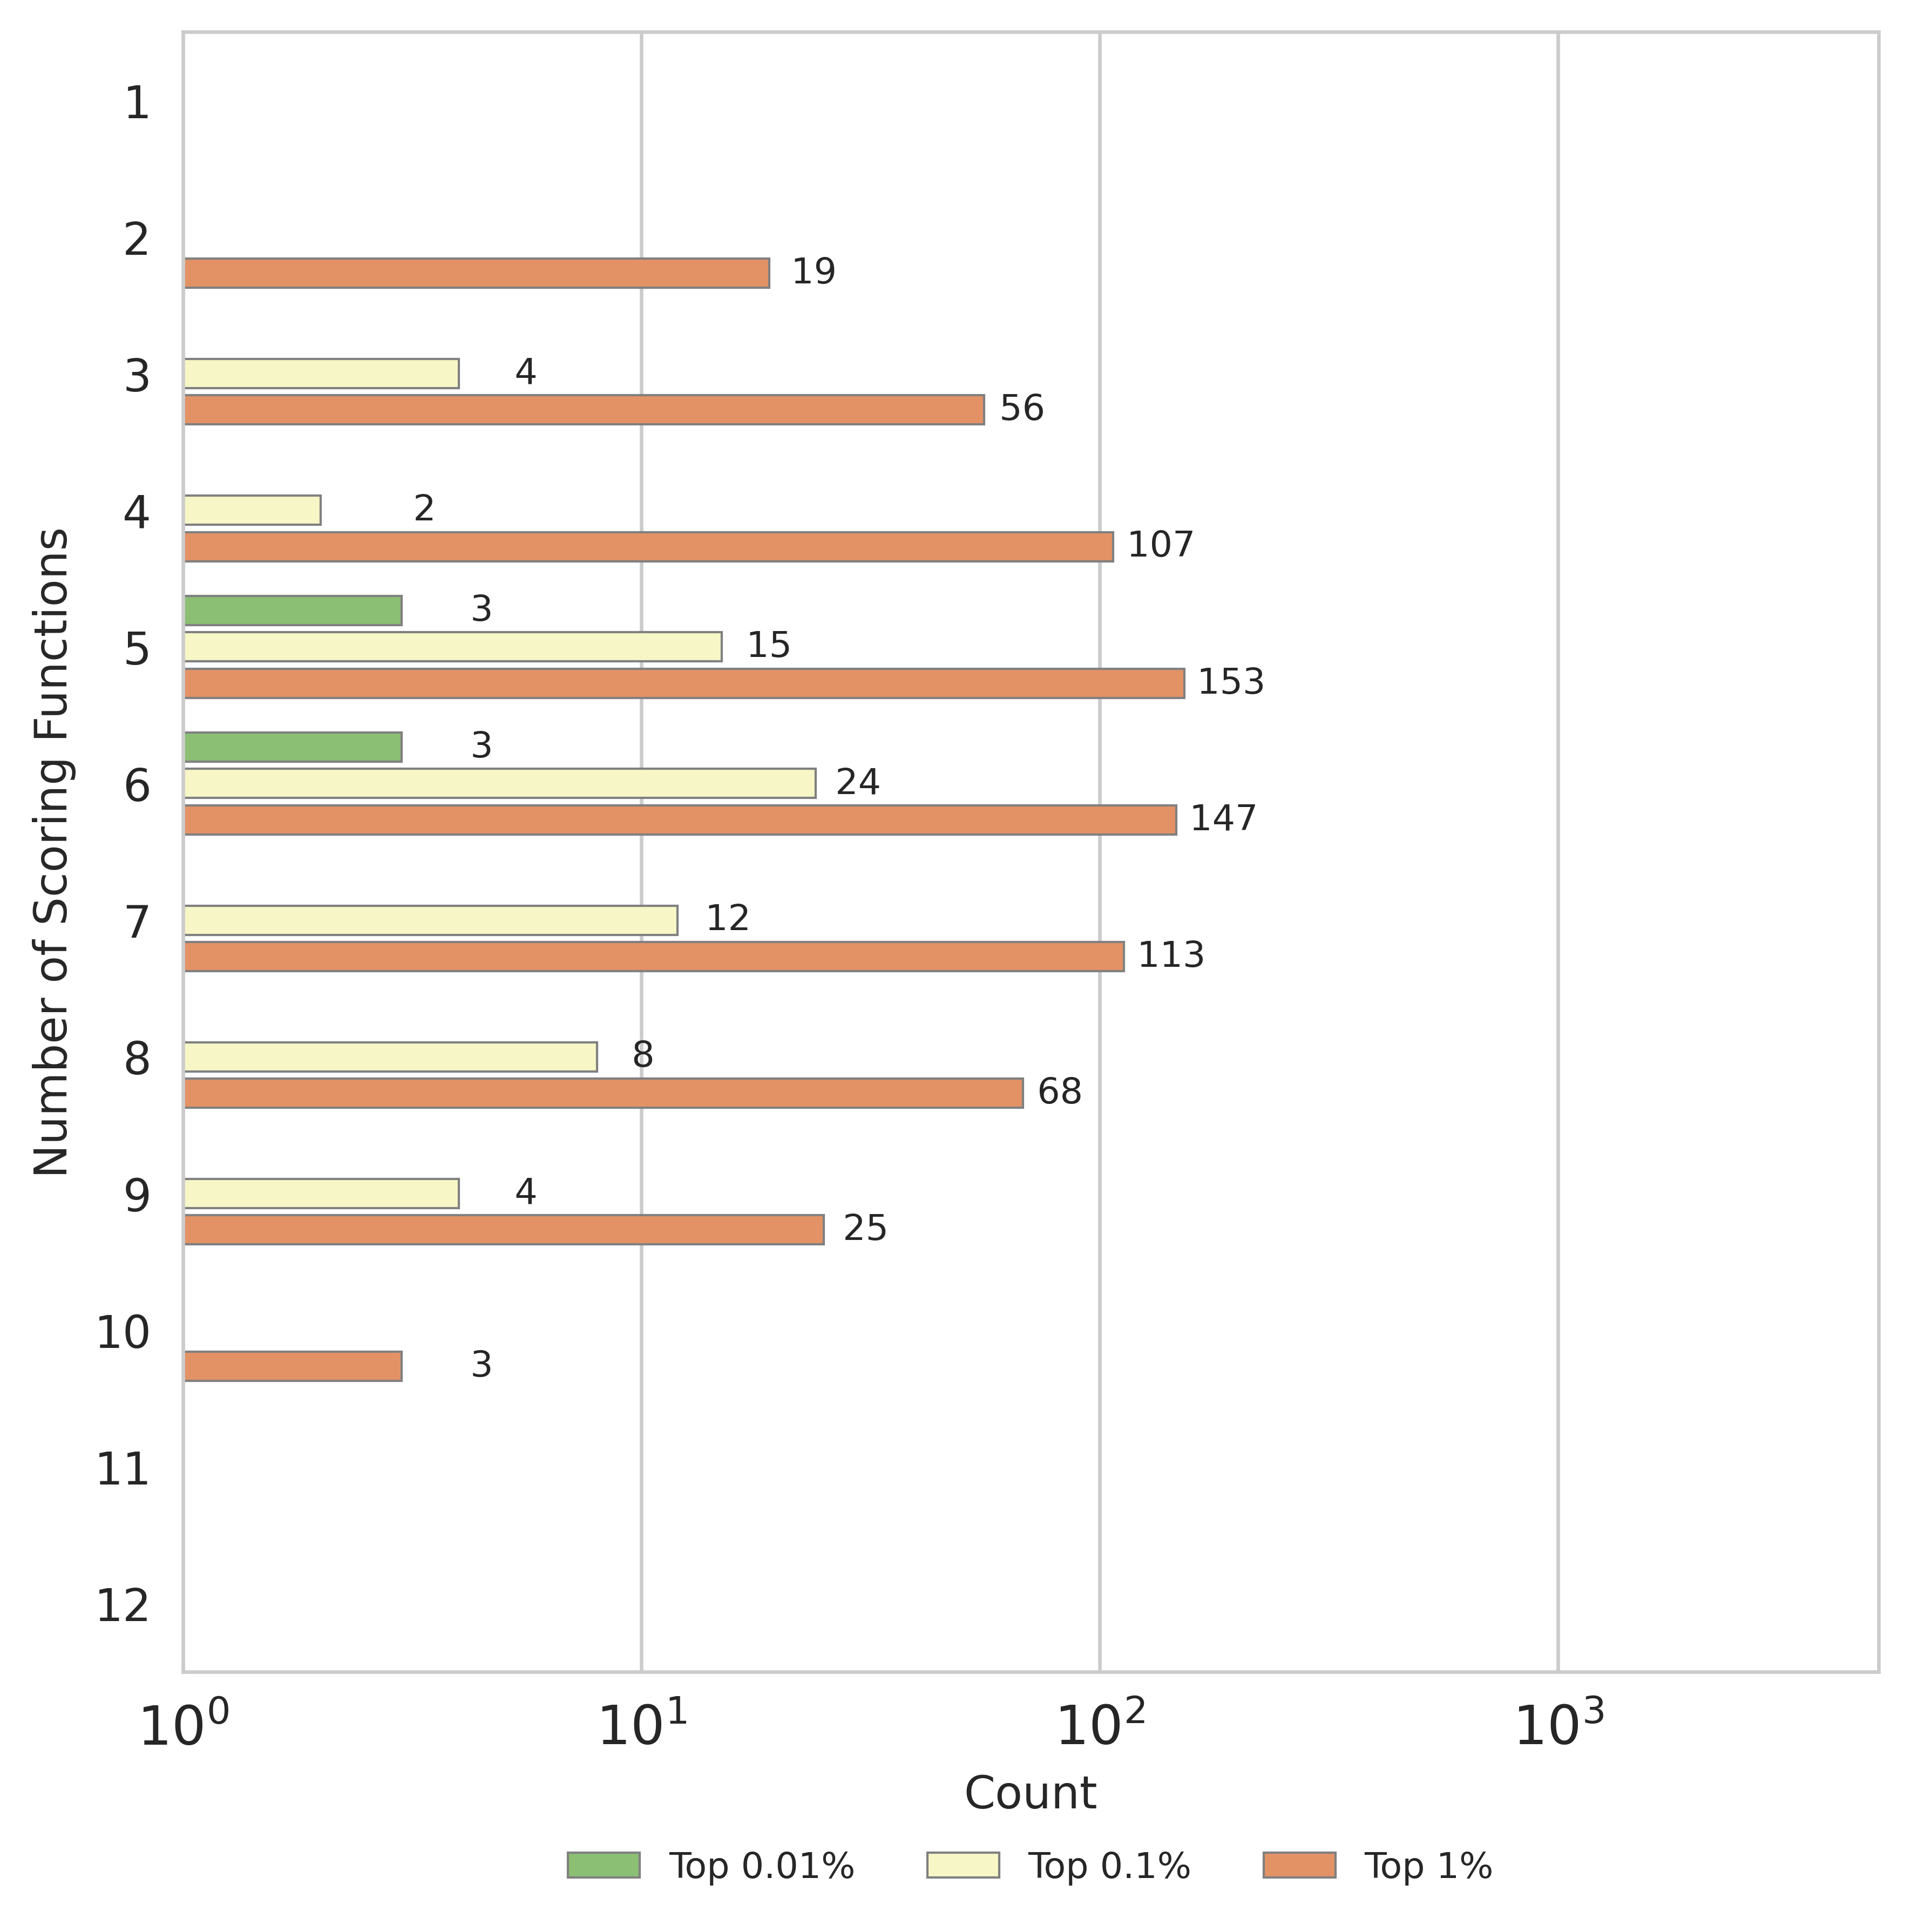

In [38]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6), dpi=600)

# Plotting the count data
ax = sns.barplot(x='Count', 
                 y='Amount of Scoring Functions', 
                 hue='Percentile', 
                 data=combined_litpcba_scoringnumber_df, 
                 order=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
                 palette="RdYlGn_r", 
                 width=0.8,
                 gap=0.2,
                 edgecolor='grey',
                 linewidth=0.5)
plt.xscale('log')

for p in ax.patches:
    width = p.get_width()
    if width > 1:
        ax.text(width + 1,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=8)

# plt.title('Occurrences of Consensus Methods in Top 1% and 0.1%')
plt.xlabel('Count')
plt.ylabel('Number of Scoring Functions')
plt.xticks(fontsize=12)
plt.legend(loc='lower center',
           fontsize=8,
           frameon=False,
           ncol=4, 
           bbox_to_anchor=(0.5, -0.15))
plt.xlim(1, 5000)
plt.tight_layout()

# Save and show the plot
plt.savefig("./litpcba_SF_number_counts.png", transparent=False, bbox_inches="tight")
plt.show()


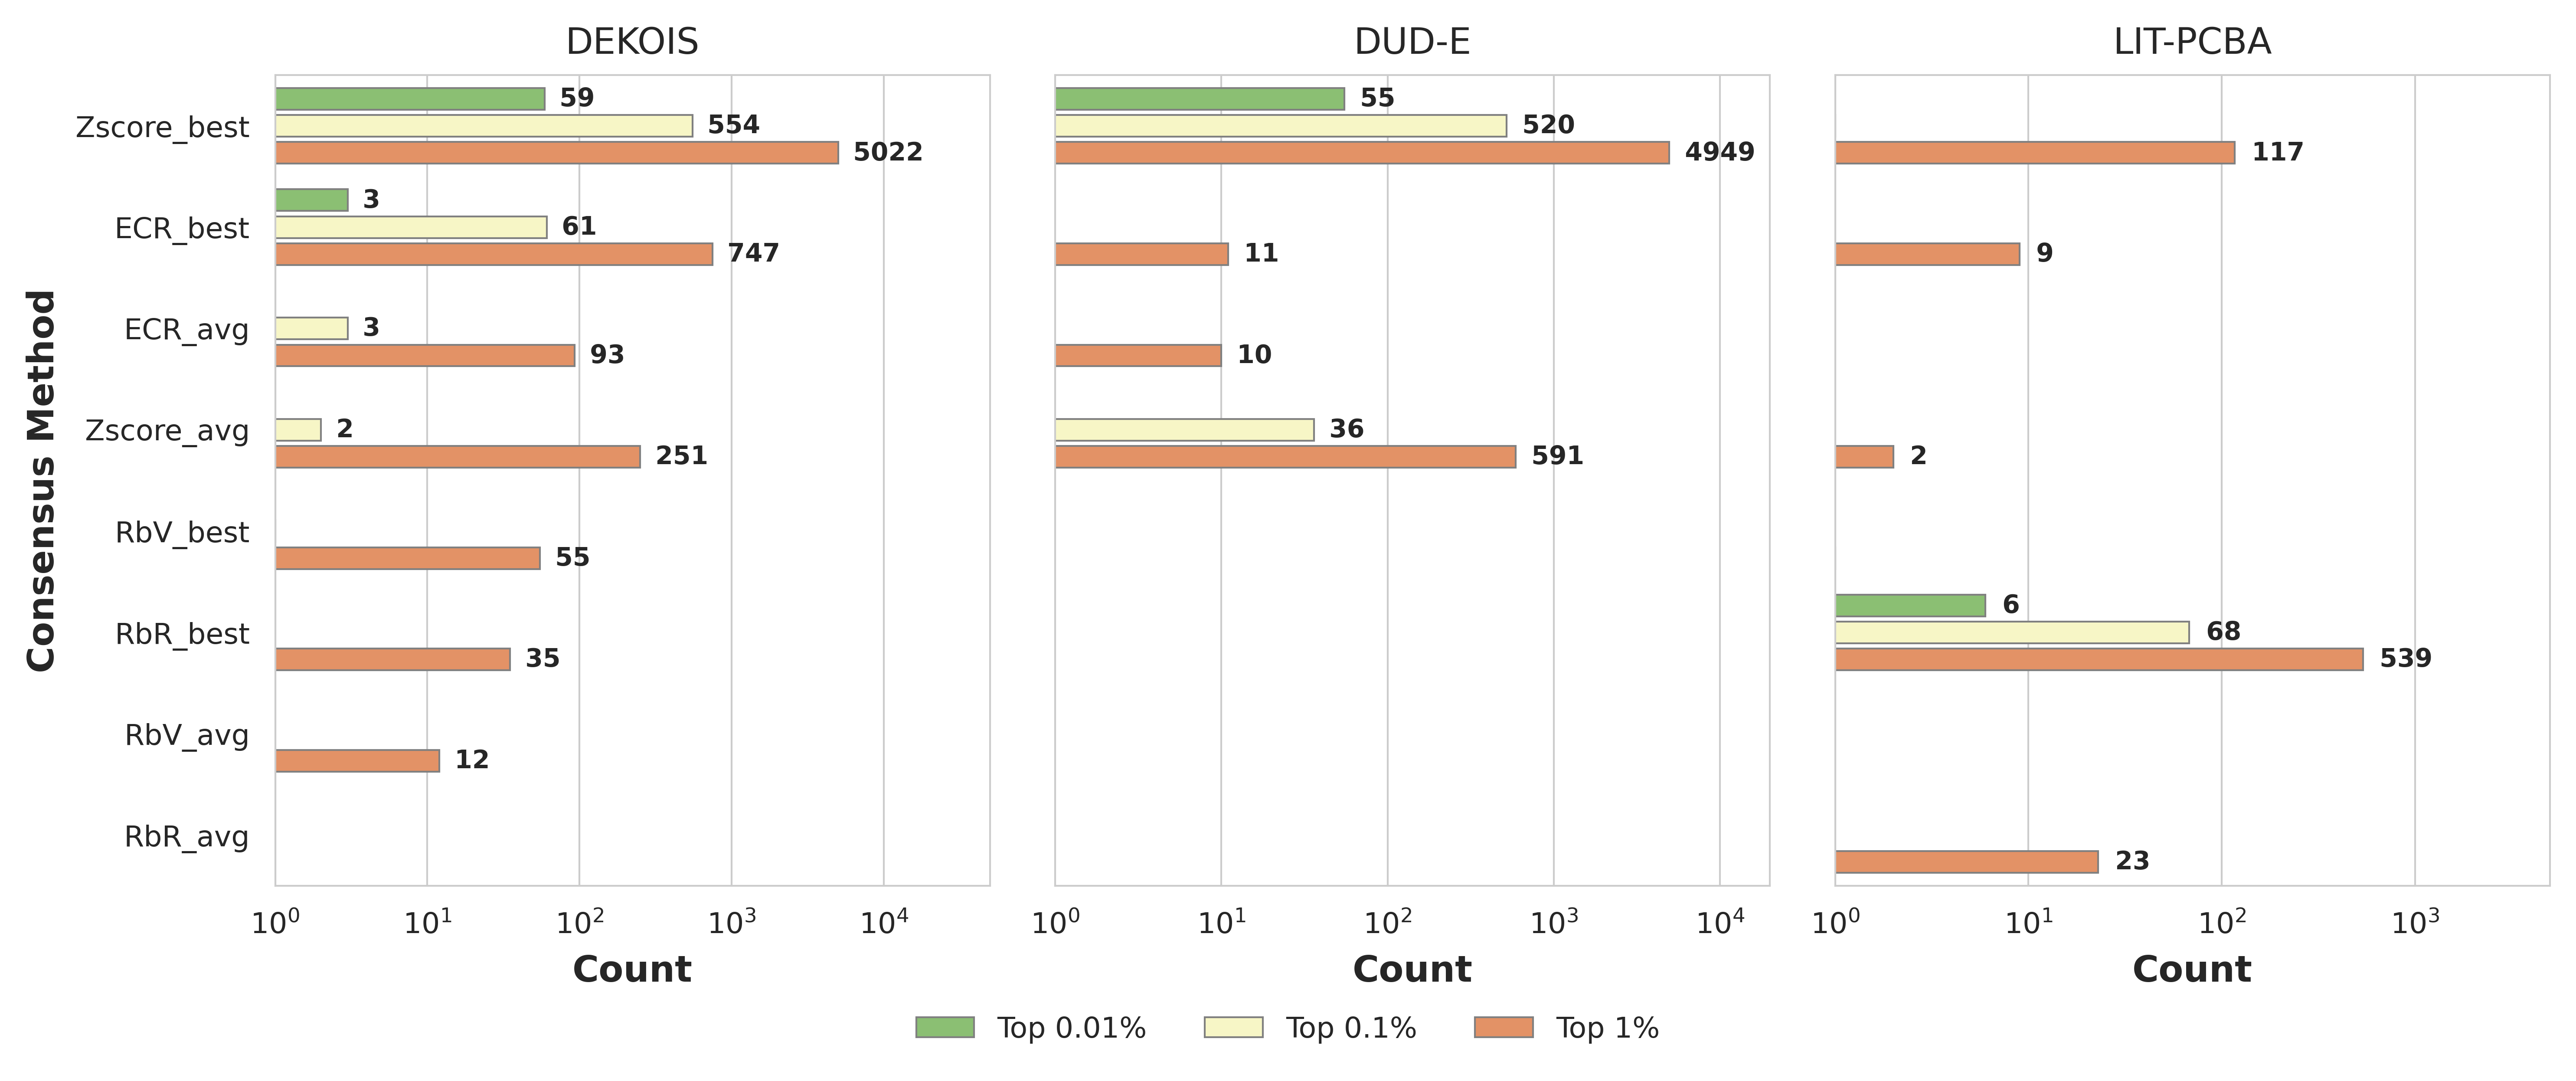

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4), dpi=600, sharey=True)
sns.set_style("whitegrid")

# Dataframes for each dataset
datasets = [combined_dekois_consensus_df, combined_dude_consensus_df,combined_litpcba_consensus_df]
dataset_names = ['DEKOIS', 'DUD-E', 'LIT-PCBA']

# Initialize an empty handles and labels list for the legend
handles, labels = [], []

xlim_values = [(1, 50000), (1, 20000), (1, 5000)]  # Adjust these limits as needed

# Loop through each dataset and create a subplot
for i, (data, dataset_name, xlim) in enumerate(zip(datasets, dataset_names, xlim_values)):
    ax = sns.barplot(
        x='Count',
        y='Consensus',
        hue='Percentile',
        data=data,
        palette="RdYlGn_r",
        width=0.8,
        gap=0.2,
        edgecolor='grey',
        linewidth=0.5,
        ax=axes[i]  # Use the appropriate subplot
    )
    ax.set_xscale('log')

    for p in ax.patches:
        width = p.get_width()
        if width > 1:
            ax.text(
                width + 0.1*width,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=7,
                fontweight='bold'
            )

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the value as needed for thickness

    ax.set_xlabel('Count', fontweight='bold')  # Make x-axis label bold
    ax.set_ylabel('Consensus Method', fontweight='bold')  # Make y-axis label bold
    ax.set_title(dataset_name, fontsize=10)  # Make subplot title bold
    ax.tick_params(axis='both', labelsize=8)
    ax.get_legend().remove()
    ax.set_xlim(xlim[0], xlim[1])
    ax.xaxis.grid(linewidth=0.5)

    # Collect the handles and labels for the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Create a common legend outside of the subplots with specified position
fig.legend(
    handles,
    labels,
    loc='lower center',  # Adjust the location as needed
    fontsize=8,
    frameon=False,
    ncol=4,
    bbox_to_anchor=(0.5, -0.04)  # Adjust the position (x, y) as needed
)

# Adjust the layout
plt.tight_layout()

# Save and show the plot
plt.savefig("./combined_consensus_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()


/tmp/ipykernel_1143753/3556330092.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_1143753/3556330092.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_1143753/3556330092.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])


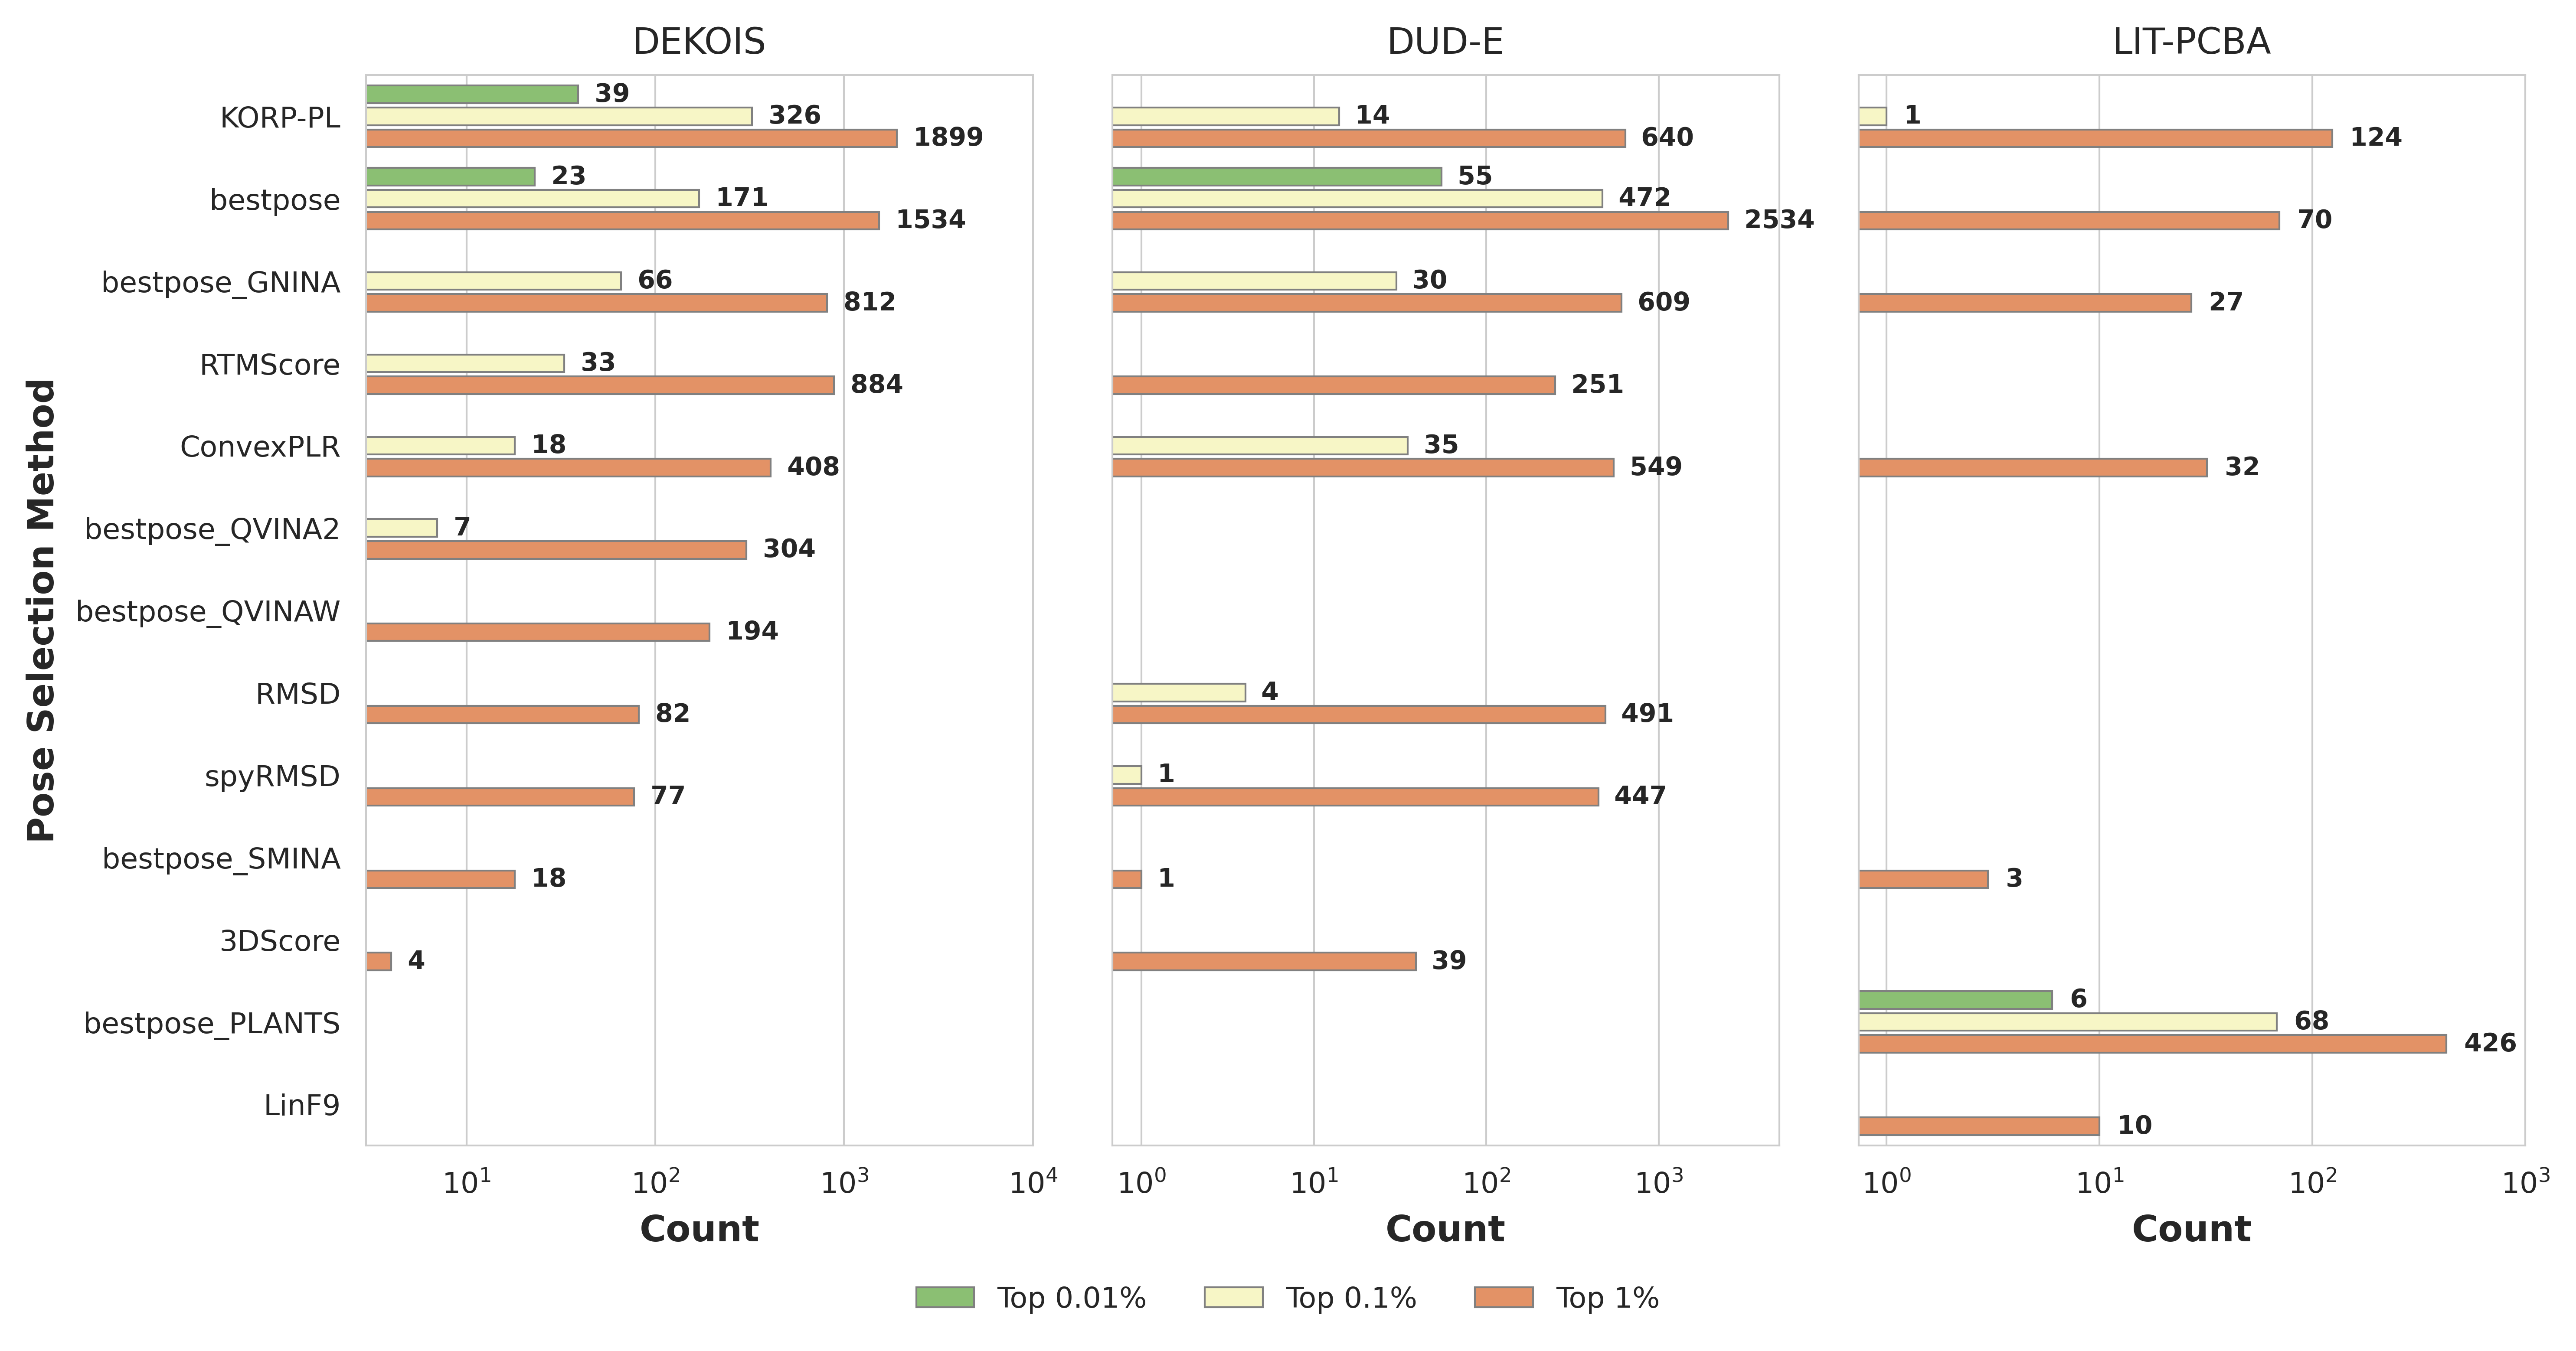

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5), dpi=600, sharey=True)
sns.set_style("whitegrid")

# Dataframes for each dataset
datasets = [combined_dekois_clustering_df, combined_dude_clustering_df,combined_litpcba_clustering_df]
dataset_names = ['DEKOIS', 'DUD-E', 'LIT-PCBA']

# Initialize an empty handles and labels list for the legend
handles, labels = [], []

xlim_values = [(0, 10000), (0, 5000), (0, 1000)]  # Adjust these limits as needed

# Loop through each dataset and create a subplot
for i, (data, dataset_name, xlim) in enumerate(zip(datasets, dataset_names, xlim_values)):
    ax = sns.barplot(
        x='Count',
        y='Clustering',
        hue='Percentile',
        data=data,
        palette="RdYlGn_r",
        width=0.8,
        gap=0.2,
        edgecolor='grey',
        linewidth=0.5,
        ax=axes[i]  # Use the appropriate subplot
    )
    ax.set_xscale('log')

    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(
                width + 0.1*width,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=7,
                fontweight='bold'
            )
            
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the value as needed for thickness

    ax.set_xlabel('Count', fontweight='bold')  # Make x-axis label bold
    ax.set_ylabel('Pose Selection Method', fontweight='bold')  # Make y-axis label bold
    ax.set_title(dataset_name, fontsize=10)  # Make subplot title bold
    ax.tick_params(axis='both', labelsize=8)
    ax.get_legend().remove()
    ax.set_xlim(xlim[0], xlim[1])
    ax.xaxis.grid(linewidth=0.5)

    # Collect the handles and labels for the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Create a common legend outside of the subplots with specified position
fig.legend(
    handles,
    labels,
    loc='lower center',  # Adjust the location as needed
    fontsize=8,
    frameon=False,
    ncol=4,
    bbox_to_anchor=(0.5, -0.04)  # Adjust the position (x, y) as needed
)

# Adjust the layout
plt.tight_layout()

# Save and show the plot
plt.savefig("./combined_clustering_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()


/tmp/ipykernel_1143753/3874692814.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_1143753/3874692814.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_1143753/3874692814.py:54: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])


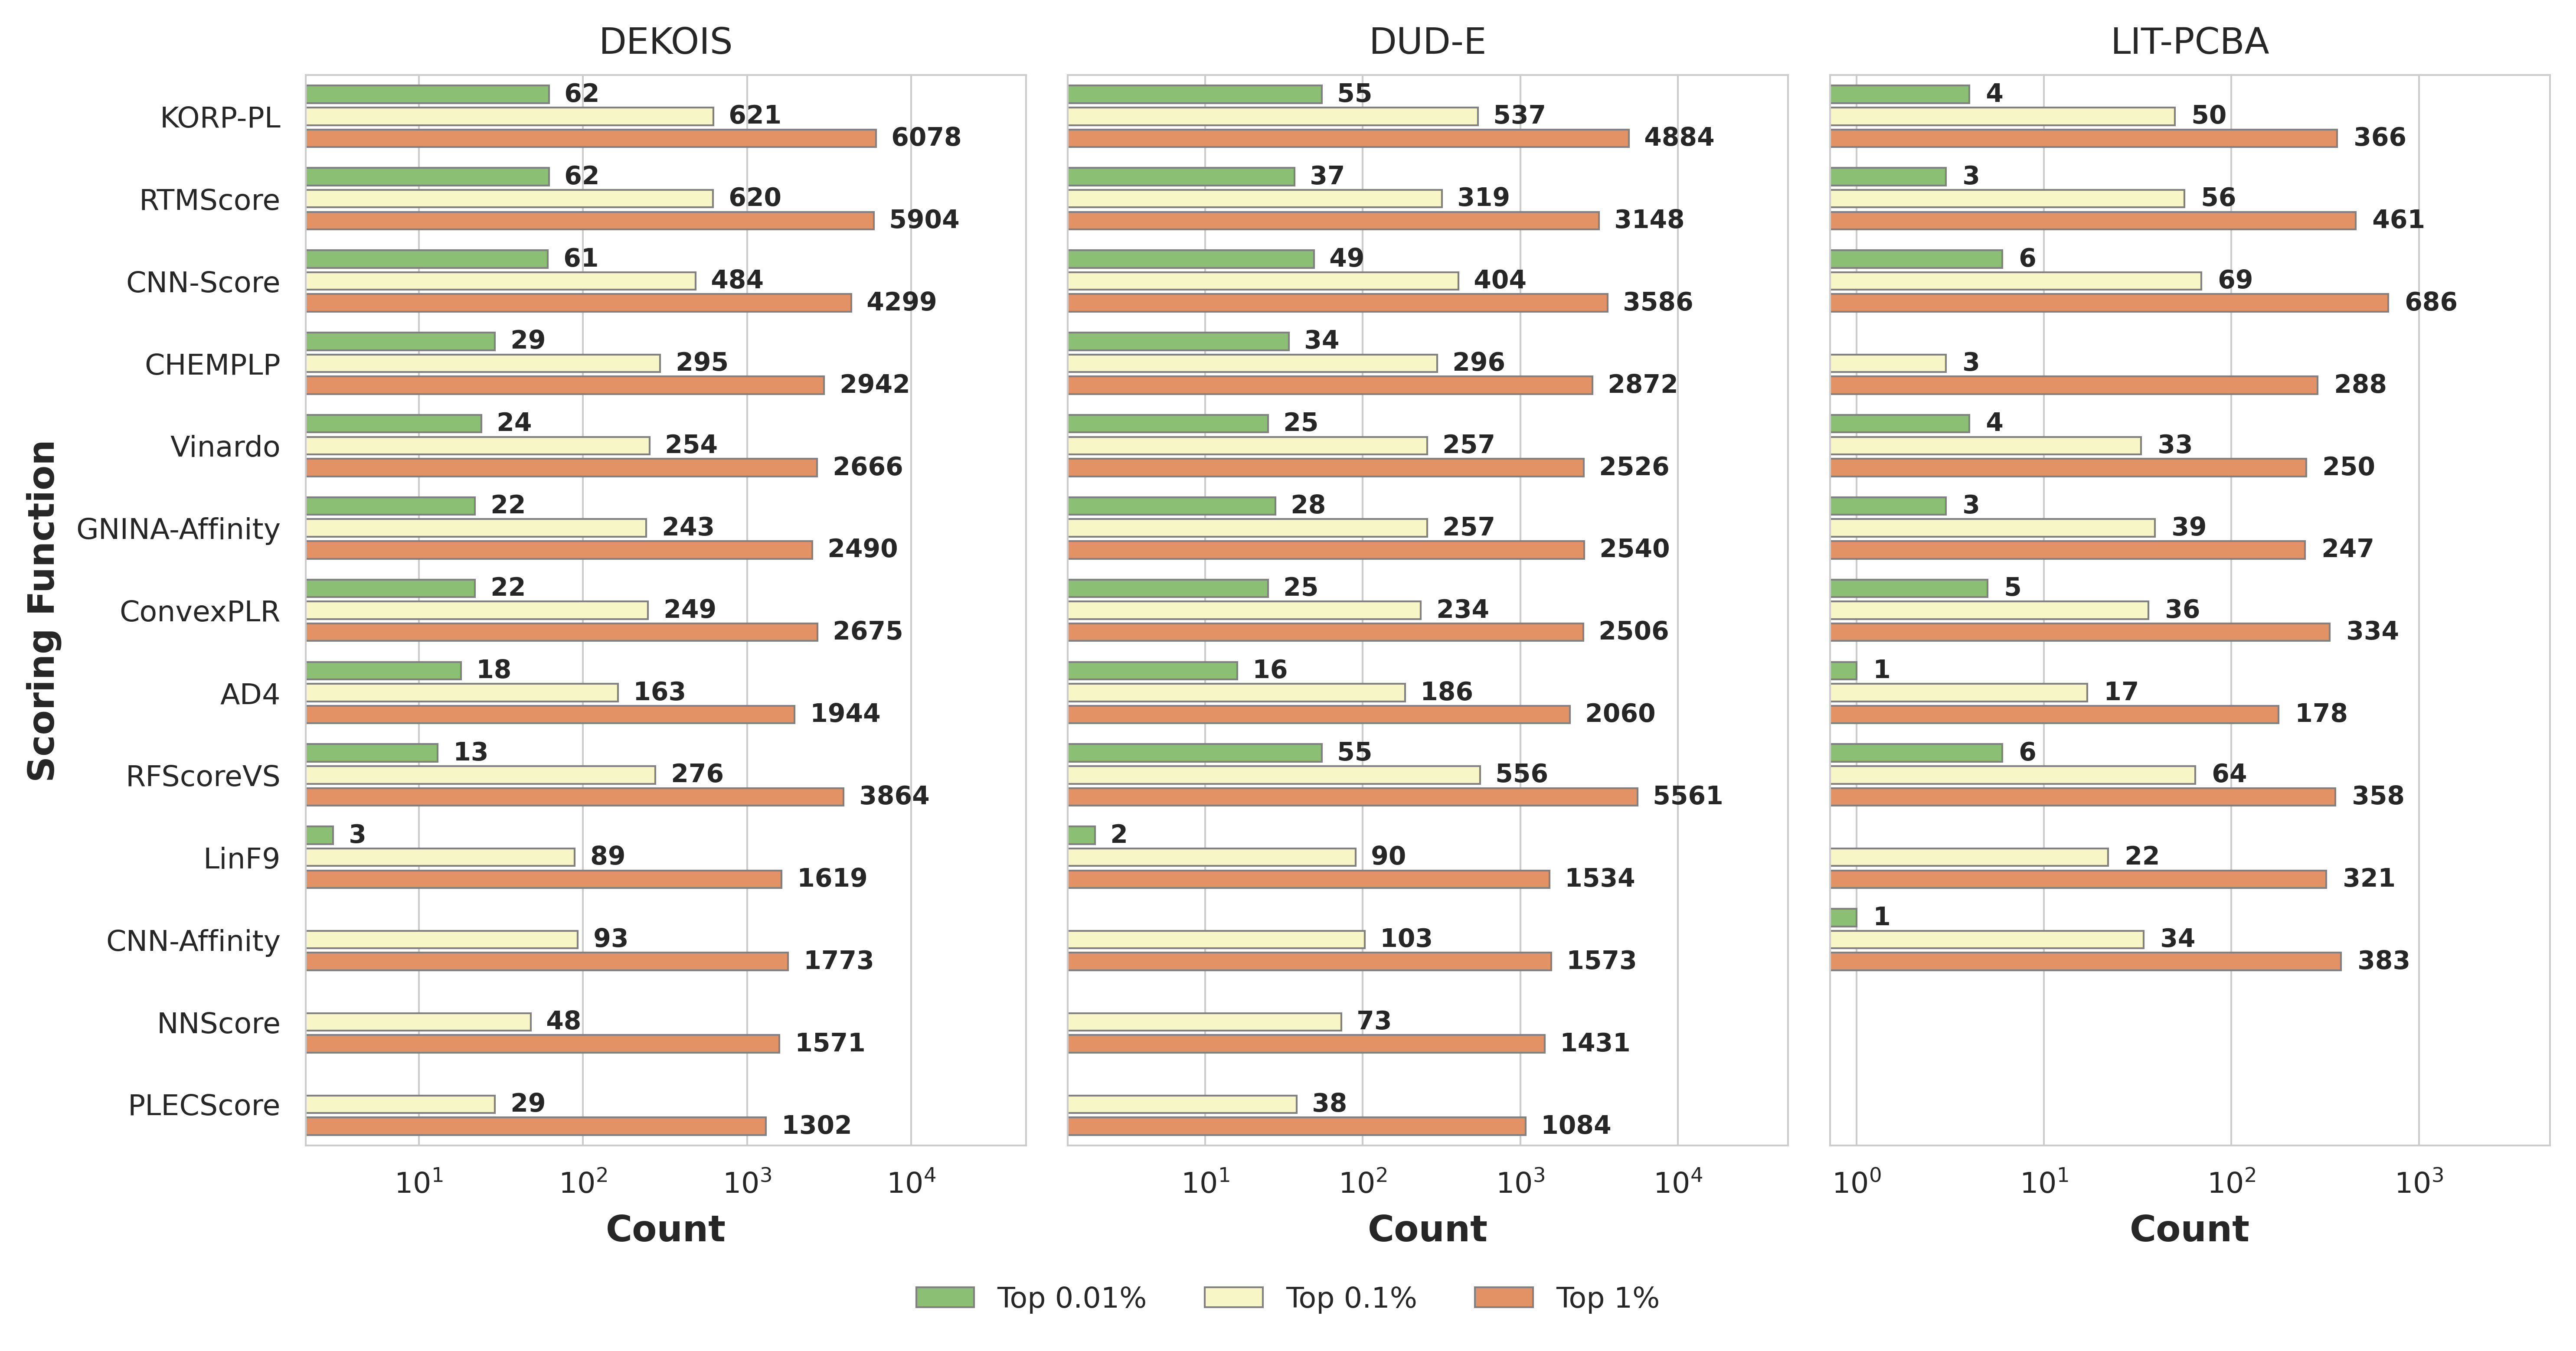

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5), dpi=600, sharey=True)
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linewidth': 0.1})

# Dataframes for each dataset
datasets = [combined_dekois_scoring_df, combined_dude_scoring_df,combined_litpcba_scoring_df]
dataset_names = ['DEKOIS', 'DUD-E', 'LIT-PCBA']

# Initialize an empty handles and labels list for the legend
handles, labels = [], []

xlim_values = [(0, 50000), (0, 50000), (0, 5000)]  # Adjust these limits as needed

# Loop through each dataset and create a subplot
for i, (data, dataset_name, xlim) in enumerate(zip(datasets, dataset_names, xlim_values)):
    ax = sns.barplot(
        x='Count',
        y='Scoring Function',
        hue='Percentile',
        data=data,
        palette="RdYlGn_r",
        width=0.8,
        gap=0.2,
        edgecolor='grey',
        linewidth=0.5,
        ax=axes[i]  # Use the appropriate subplot
    )
    ax.set_xscale('log')

    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(
                width + 0.1*width,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=7,
                fontweight='bold'
            )

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the value as needed for thickness

    ax.set_xlabel('Count', fontweight='bold')  # Make x-axis label bold
    ax.set_ylabel('Scoring Function', fontweight='bold')  # Make y-axis label bold
    ax.set_title(dataset_name, fontsize=10)  # Make subplot title bold
    ax.tick_params(axis='both', labelsize=8)
    ax.get_legend().remove()
    ax.set_xlim(xlim[0], xlim[1])
    ax.xaxis.grid(linewidth=0.5)
    
    ax.xaxis.grid(linewidth=0.5)

    # Collect the handles and labels for the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Create a common legend outside of the subplots with specified position
fig.legend(
    handles,
    labels,
    loc='lower center',  # Adjust the location as needed
    fontsize=8,
    frameon=False,
    ncol=4,
    bbox_to_anchor=(0.5, -0.04)  # Adjust the position (x, y) as needed
)

# Adjust the layout
plt.tight_layout()

# Save and show the plot
plt.savefig("./combined_sf_methods_counts.png", transparent=False, bbox_inches="tight")
plt.show()


/tmp/ipykernel_1143753/101129593.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_1143753/101129593.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])
/tmp/ipykernel_1143753/101129593.py:55: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(xlim[0], xlim[1])


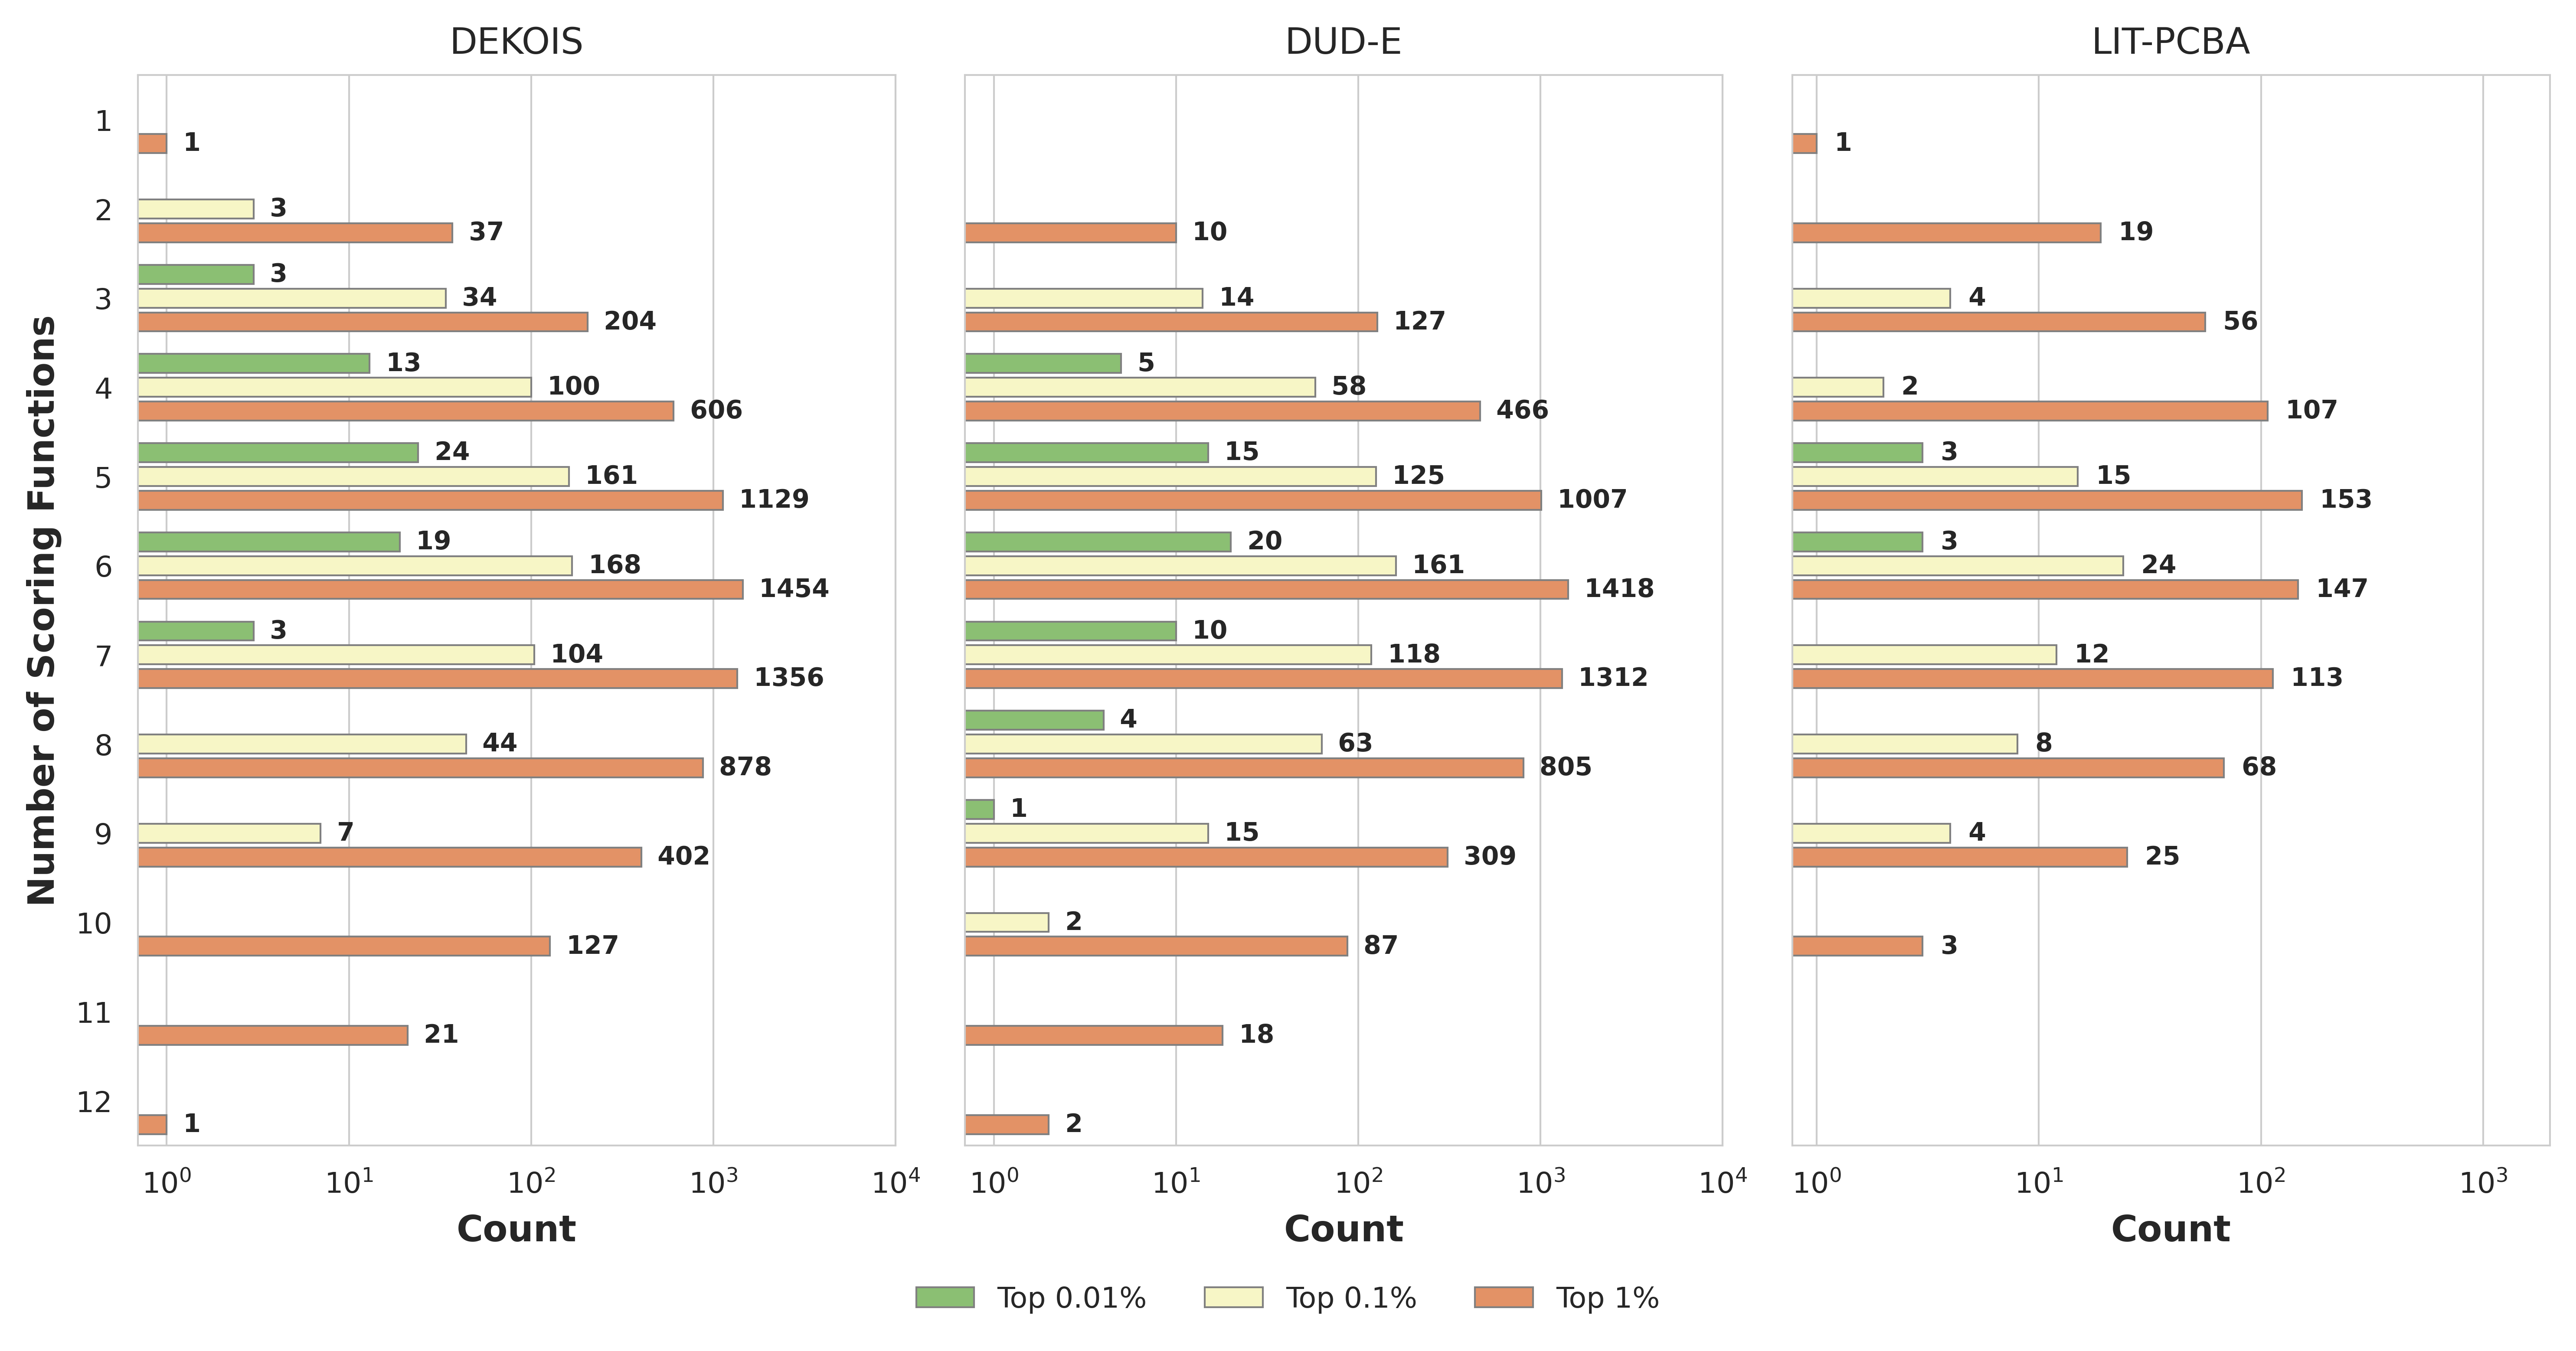

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5), dpi=600, sharey=True)
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linewidth': 0.1})

# Dataframes for each dataset
datasets = [combined_dekois_scoringnumber_df, combined_dude_scoringnumber_df,combined_litpcba_scoringnumber_df]
dataset_names = ['DEKOIS', 'DUD-E', 'LIT-PCBA']

# Initialize an empty handles and labels list for the legend
handles, labels = [], []

xlim_values = [(0, 10000), (0, 10000), (0, 2000)]  # Adjust these limits as needed

# Loop through each dataset and create a subplot
for i, (data, dataset_name, xlim) in enumerate(zip(datasets, dataset_names, xlim_values)):
    ax = sns.barplot(
        x='Count',
        y='Amount of Scoring Functions',
        hue='Percentile',
        data=data,
        order = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
        palette="RdYlGn_r",
        width=0.8,
        gap=0.2,
        edgecolor='grey',
        linewidth=0.5,
        ax=axes[i]  # Use the appropriate subplot
    )
    ax.set_xscale('log')

    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            ax.text(
                width + 0.1*width,
                p.get_y() + p.get_height() / 2,
                ' {:1.0f}'.format(width),
                ha='left',
                va='center',
                fontsize=7,
                fontweight='bold'
            )

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)  # Adjust the value as needed for thickness

    ax.set_xlabel('Count', fontweight='bold')  # Make x-axis label bold
    ax.set_ylabel('Number of Scoring Functions', fontweight='bold')  # Make y-axis label bold
    ax.set_title(dataset_name, fontsize=10)  # Make subplot title bold
    ax.tick_params(axis='both', labelsize=8)
    ax.get_legend().remove()
    ax.set_xlim(xlim[0], xlim[1])
    ax.xaxis.grid(linewidth=0.5)
    
    ax.xaxis.grid(linewidth=0.5)

    # Collect the handles and labels for the legend
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Create a common legend outside of the subplots with specified position
fig.legend(
    handles,
    labels,
    loc='lower center',  # Adjust the location as needed
    fontsize=8,
    frameon=False,
    ncol=4,
    bbox_to_anchor=(0.5, -0.04)  # Adjust the position (x, y) as needed
)

# Adjust the layout
plt.tight_layout()

# Save and show the plot
plt.savefig("./combined_sf_number_counts.png", transparent=False, bbox_inches="tight")
plt.show()
